<a href="https://colab.research.google.com/github/greatshotkid/greatshotkid/blob/main/Unobias002(260824).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing dataset from google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the zip file

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/My Dataset.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

## **Importing the required libraries**

In [3]:
!pip install PyMuPDF nltk tensorflow pandas numpy pdfminer.six



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.4 MB/s eta 0:00:00


In [4]:
from pdfminer.high_level import extract_text
import os
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
import json
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **Extracting text from the pdf CVs**

In [14]:
def extract_text_from_pdfs(cv_pdf):
    text_data = []
    for filename in os.listdir(cv_pdf):
        if filename.endswith(".pdf"):
            filepath = os.path.join(cv_pdf, filename)
            try:
                text = extract_text(filepath)
                text_data.append((filename,text))
                #print(f"Successfully processed {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}") #prints filename if an error occurs during processing
    return text_data


cv_pdf = '/content/dataset/My Dataset'
#cv_texts = extract_text_from_pdfs(cv_pdf)


## Print extract for each pdf

In [8]:
"""
for i, text in enumerate(cv_texts):
    print(f"\nExtracted Text from Document {i+1}:\n")
    print(text)
"""

Streaming output truncated to the last 5000 lines.
 
 
 
 
  PROJECT: PROPOSED HOUSING DEVELOPMENT, KAJIADO 

CLIENT: PAMORA INVESTMENTS LIMITED 
PROJECT STATUS: ONGOING 

  PROJECT:PROPOSED HOUSING DEVELOPMENT 

CLIENT: URITHI SACCO 
PROJECT STATUS: ONGOING 

  PROJECT: PROPOSED MULTI SPECIALITY HOSPITAL, BUNGOMA 

CLIENT: LIFE CARE HOSPITAL LTD 
PROJECT STATUS: ONGOING 

Hobbies and Interests   
Able to lead and supervise, enjoy reading books, solving puzzles and playing hockey.   

 
 
 
 
 
 
  
  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
REFERENCE 

1.  QS PETER MVOI MWANYUMBA.   

DIRECTOR NYANGE INTEGRATED CONSULTANTS LTD.   
CELLPHONE: +254 723 671040  

2. 

ARCH. TUESDAY NYAKAGO   
DIRECTOR LOCUS STUDIO 
CELLPHONE: +254 710 446137 

3.  NASHON OKOWA 

BEACON AFRICA CONSULTANTS (PROJECT MANAGERS) 
CHAIRMAN: ASSOCIATION OF CONSTRUCTION MANAGERS OF 
KENYA   
CELLPHONE: +254 726 860568 

 
 
 
 
 
 
 
 
 
  
  
  
  
  
  


Extracted Text from Document 3461:

THAMIZ SELVAN.R 
B.E,Civil

##Load keywords

In [15]:
def load_keywords(keyword_file):
    with open(keyword_file, 'r') as file:
        keywords = [line.strip() for line in file.readlines()]
    return keywords


keyword_file = '/content/drive/MyDrive/ITkeywords.txt'
#keywords = load_keywords(keyword_file)


##Printing an extract of keywords

In [11]:
"""
for i, text in enumerate(keywords):
    print(f"\nExtracted Text from Document {i+1}:\n")
    print(text)
"""


Extracted Text from Document 1:

.NET

Extracted Text from Document 2:

algorithms

Extracted Text from Document 3:

android

Extracted Text from Document 4:

architecture

Extracted Text from Document 5:

architectures

Extracted Text from Document 6:

audio

Extracted Text from Document 7:

AutoCAD

Extracted Text from Document 8:

AWS

Extracted Text from Document 9:

big data

Extracted Text from Document 10:

business analysis

Extracted Text from Document 11:

business continuity

Extracted Text from Document 12:

C (programming language)

Extracted Text from Document 13:

C#

Extracted Text from Document 14:

C++

Extracted Text from Document 15:

CAD

Extracted Text from Document 16:

certification

Extracted Text from Document 17:

Cisco

Extracted Text from Document 18:

cloud

Extracted Text from Document 19:

compliance

Extracted Text from Document 20:

computer applications

Extracted Text from Document 21:

computer science

Extracted Text from Document 22:

controls

E

##Vectorizing keywords and text

In [9]:
def vectorize(texts, keywords):

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(texts + keywords)
  sequences = tokenizer.texts_to_sequences(texts)
  max_length = max(len(seq) for seq in sequences)
  padded_sequences = pad_sequences(sequences, maxlen=max_length)

  keyword_sequences = tokenizer.texts_to_sequences(keywords)
  return padded_sequences, keyword_sequences


##Creating labels

In [10]:
def create_labels(sequences, keyword_sequences):

  labels = []
  for sequence in sequences:
    if any(keyword in sequence for keyword in keyword_sequences):
      labels.append(1)
    else:
      labels.append(0)
  return labels

## Preprocessing the data

In [11]:
def preprocess_data(pdf_files, keywords):

  texts = extract_text_from_pdfs(pdf_files)
  cleaned_texts = [clean_text(text) for text in texts]
  padded_sequences, keyword_sequences = vectorize(cleaned_texts, keywords)
  labels = create_labels(padded_sequences, keyword_sequences)
  return padded_sequences, labels

In [17]:
padded_sequences, labels = preprocess_data(cv_pdf, keyword_file)

TypeError: expected string or bytes-like object

##Tokenizing and padding sequences

In [18]:
"""
def preprocess_texts(texts, max_num_words=40000, max_seq_length=1000):
    tokenizer = Tokenizer(num_words=max_num_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)
    return padded_sequences, tokenizer


texts = [text for _, text in cv_texts]  # Extract only text from cv_texts
padded_sequences, tokenizer = preprocess_texts(texts)
"""

##Encoding keywords as multi-label targets

In [19]:
"""
def create_keyword_labels(cv_texts, keywords):
    labels = []
    for _, text in cv_texts:
        text = text.lower()
        label = [1 if keyword in text else 0 for keyword in keywords]
        labels.append(label)
    return np.array(labels)


labels = create_keyword_labels(cv_texts, keywords)
"""

##Splitting the data into training and validation set

In [40]:
# Split the data into training (80%) and testing (20%) sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# Split the training set into training (75%) and validation (25%) sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
)

##Building the model

In [20]:
input_dim = 40000  # Based on tokenizer settings
output_dim = len(keywords)  # Number of keywords
input_length = 1000  # Max sequence length used in padding


In [24]:
model_8 = Sequential([
    Embedding(input_dim=input_dim, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(output_dim, activation = 'sigmoid')
    ])

##Compiling the model

In [25]:
model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

## Training and saving the model

In [41]:
history_model_8 = model_8.fit(
    X_train, y_train,
    epochs = 10,
    batch_size=32,
    validation_data=(X_val, y_val)

)

#Saving the model
model_8.save('model_8.keras')
with open('history_model_8.json', 'w') as f:
    json.dump(history_model_8.history, f)

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.0662 - loss: 0.0796 - val_accuracy: 0.0831 - val_loss: 0.0822
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.0827 - loss: 0.0808 - val_accuracy: 0.0845 - val_loss: 0.0815
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.0806 - loss: 0.0799 - val_accuracy: 0.0860 - val_loss: 0.0810
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.0769 - loss: 0.0790 - val_accuracy: 0.0974 - val_loss: 0.0809
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.0948 - loss: 0.0755 - val_accuracy: 0.0688 - val_loss: 0.0806
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.0901 - loss: 0.0773 - val_accuracy: 0.0888 - val_loss: 0.0805
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.0949 - loss: 0.0758 - val_accuracy: 0.0774 - val_loss: 0.0799
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.0943 - loss: 0.0718 - val_accuracy: 0.1074 - v

##Model summary

In [42]:
model_8.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 1000, 128)           │       5,120,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 123)                 │          15,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,704,051 (59.91 MB)

 Trainable params: 5,234,683 (19.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,469,368 (39.94 MB)

##Reloading the model

In [43]:
model_8 = tf.keras.models.load_model('model_8.keras')
with open('history_model_8.json') as f:
    history_model_8 = json.load(f)

##Plotting the training history

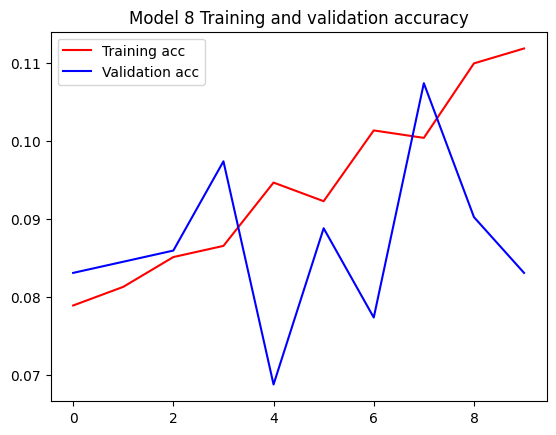

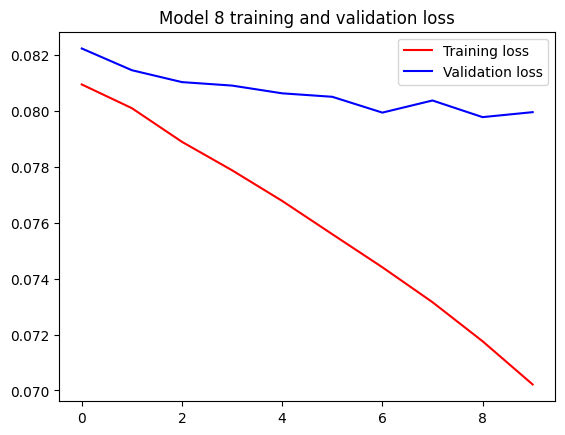

In [44]:
acc = history_model_8['accuracy']
val_acc = history_model_8['val_accuracy']
loss = history_model_8['loss']
val_loss = history_model_8['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 8 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 8 training and validation loss')
plt.legend()

plt.show()

##Confusion matrix

##Making a prediction

In [48]:
y_pred_prob = model_8.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


##Predictions to binary labels

In [49]:
threshold = 0.75
y_pred = (y_pred_prob > threshold).astype(int)

##Calculating the Matrix

In [51]:
# Compute confusion matrices for each class
conf_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Print confusion matrices
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for Keyword {i}:")
    print(conf_matrix)
    print()

Confusion Matrix for Keyword 0:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 1:
[[691   0]
 [  7   0]]

Confusion Matrix for Keyword 2:
[[690   0]
 [  8   0]]

Confusion Matrix for Keyword 3:
[[644   3]
 [ 27  24]]

Confusion Matrix for Keyword 4:
[[689   0]
 [  9   0]]

Confusion Matrix for Keyword 5:
[[684   0]
 [ 14   0]]

Confusion Matrix for Keyword 6:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 7:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 8:
[[692   0]
 [  6   0]]

Confusion Matrix for Keyword 9:
[[686   0]
 [ 12   0]]

Confusion Matrix for Keyword 10:
[[694   0]
 [  4   0]]

Confusion Matrix for Keyword 11:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 12:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 13:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 14:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 15:
[[597   1]
 [ 99   1]]

Confusion Matrix for Keyword 16:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 17:
[[668   

##Visualising the matirx

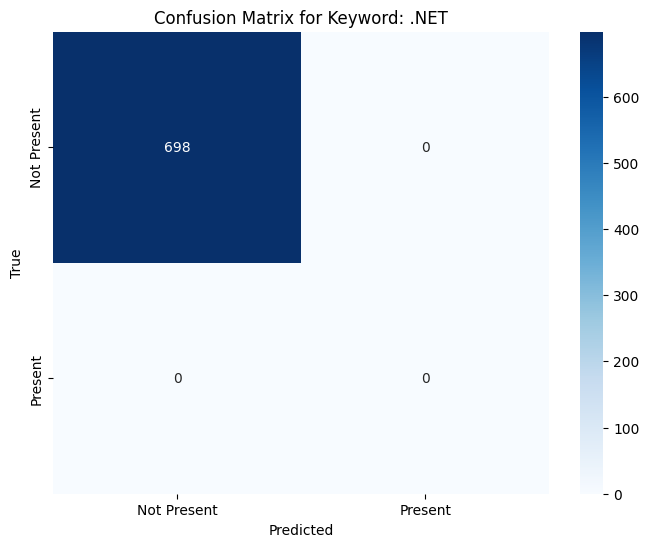

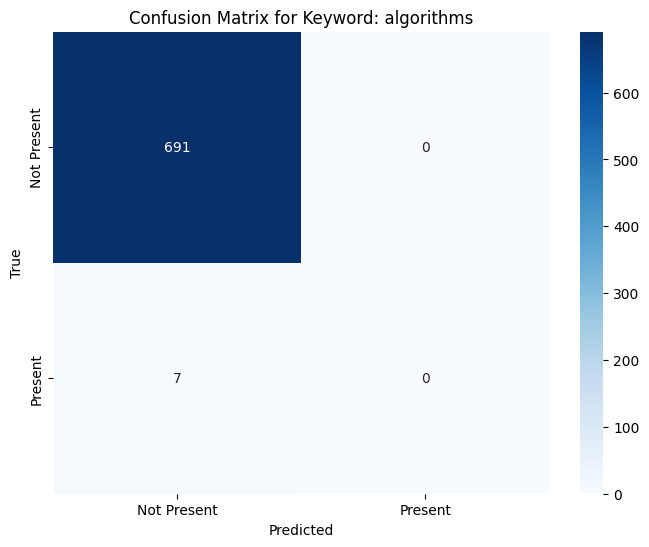

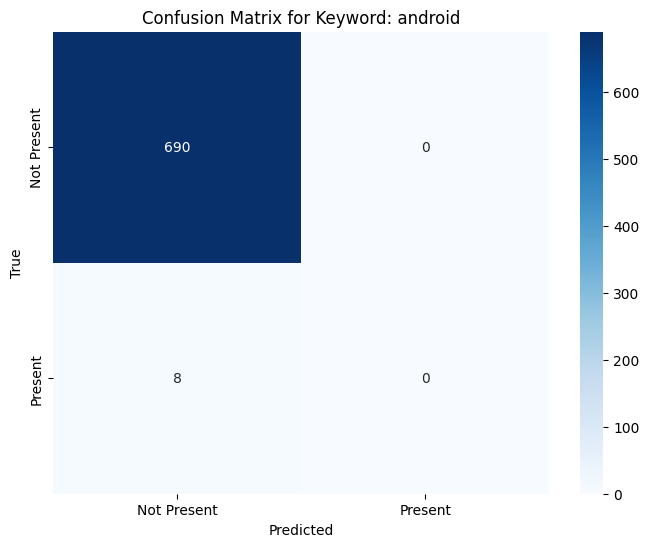

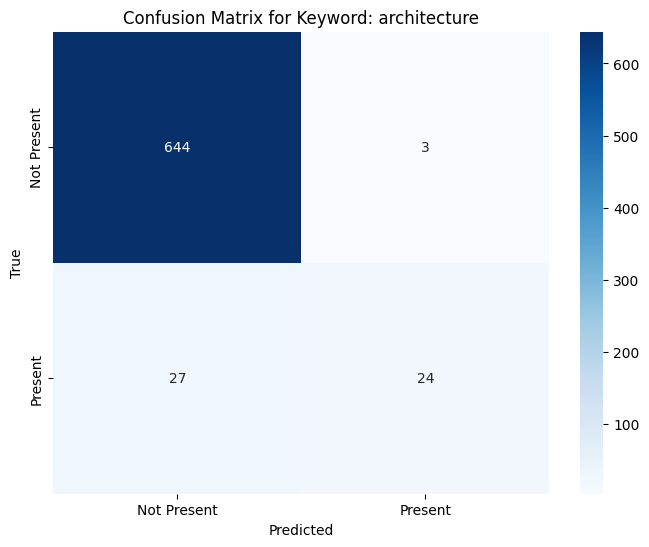

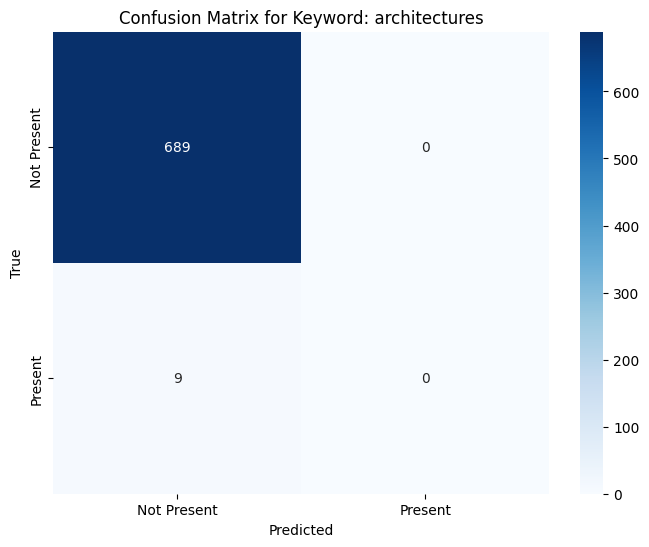

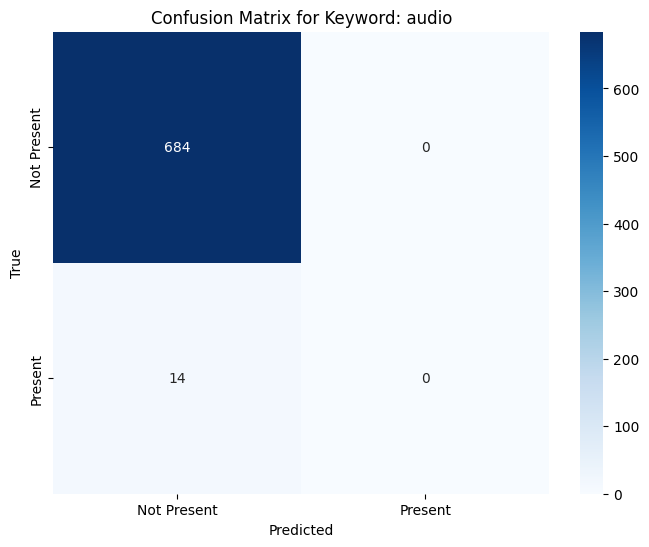

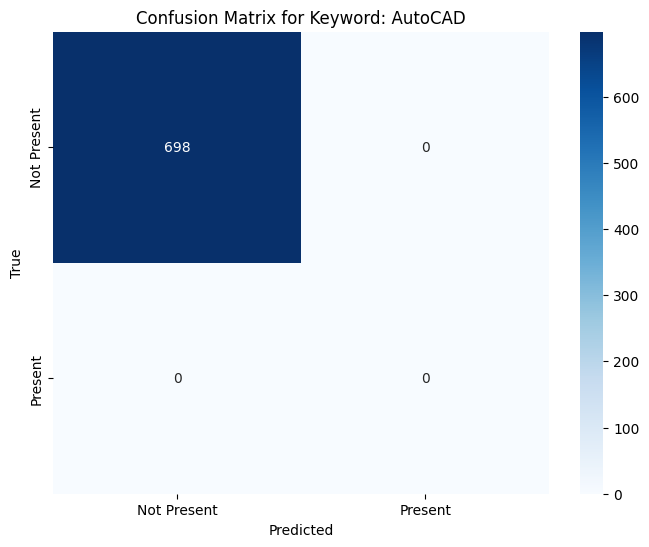

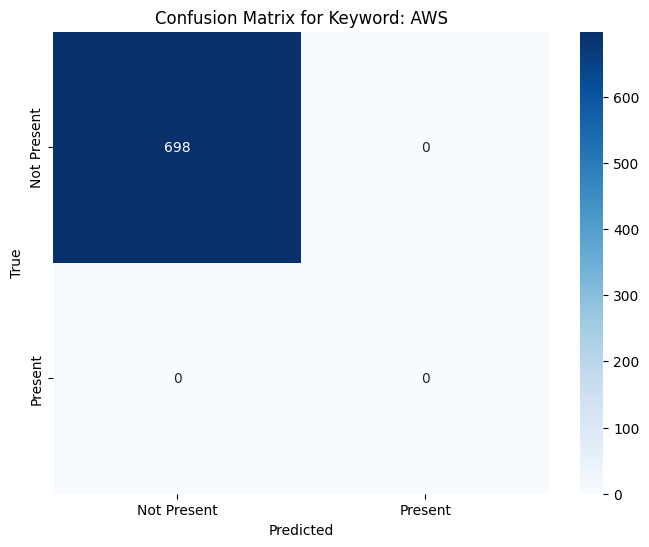

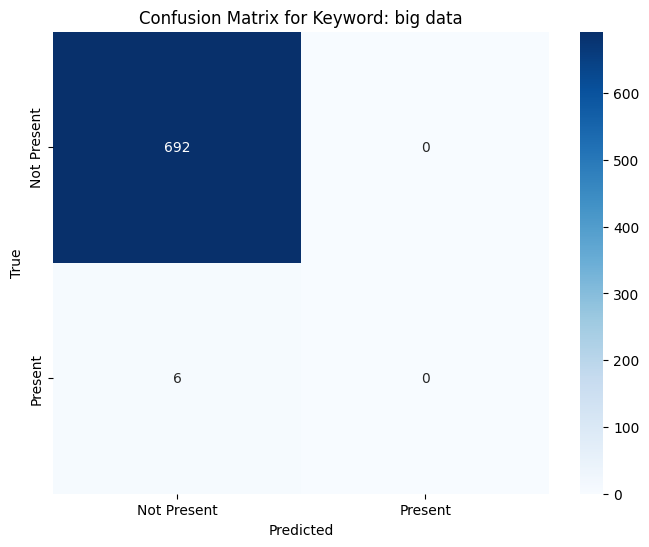

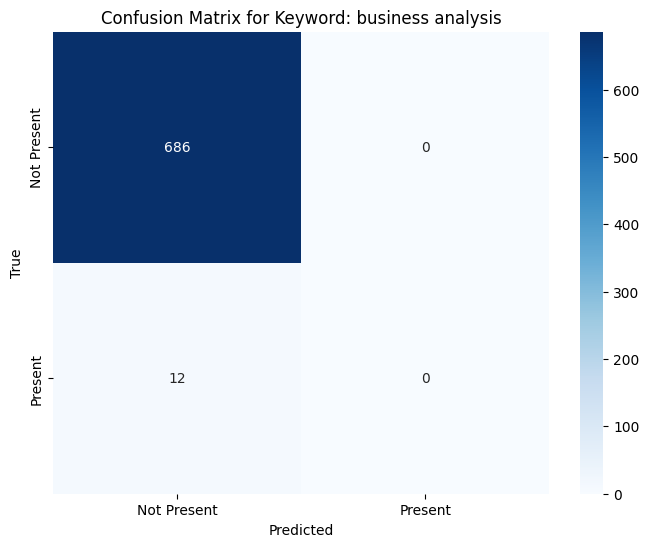

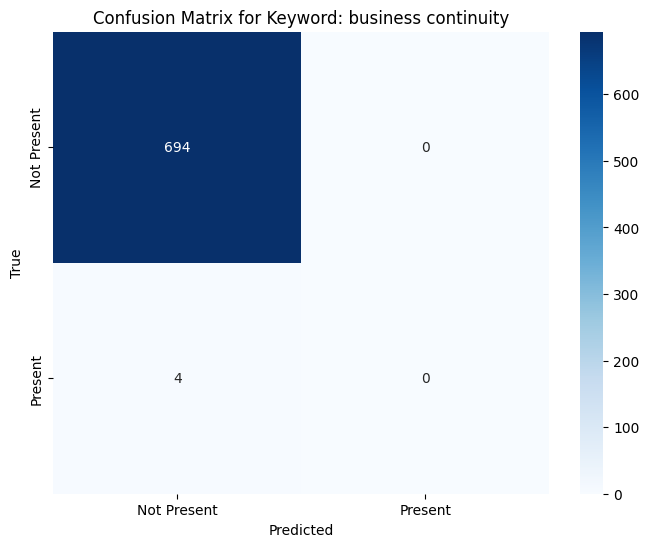

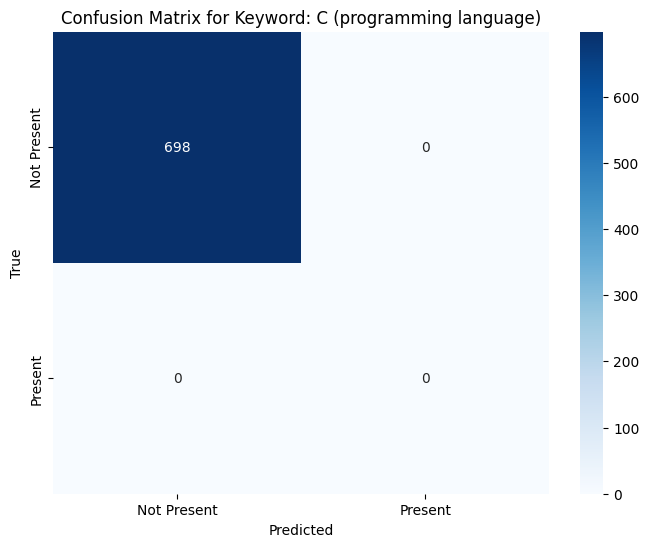

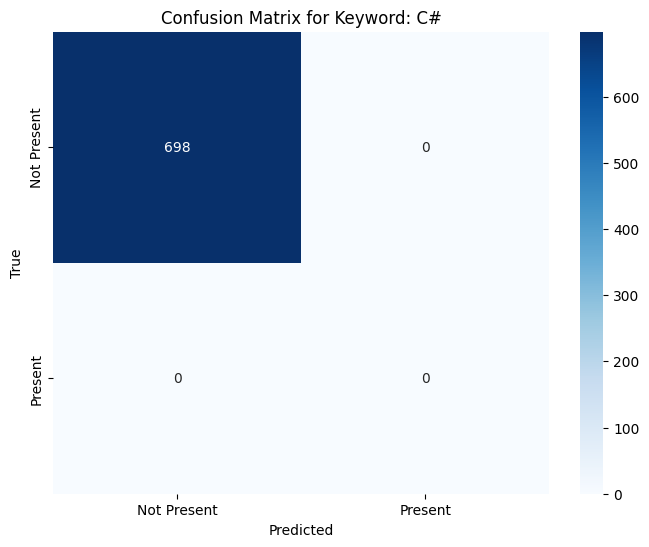

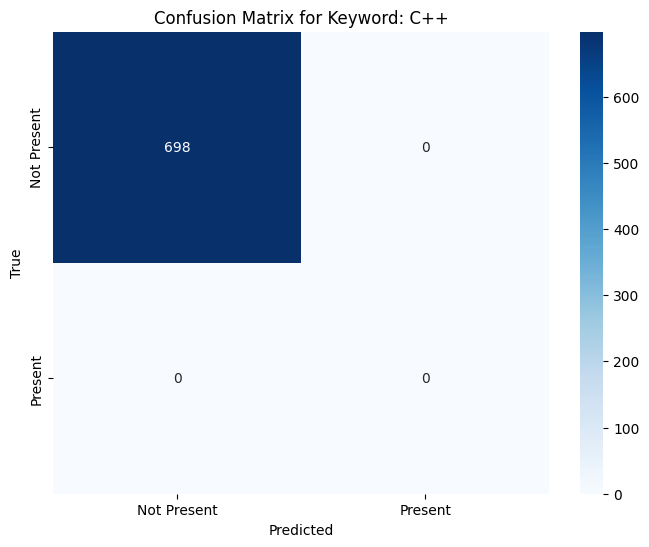

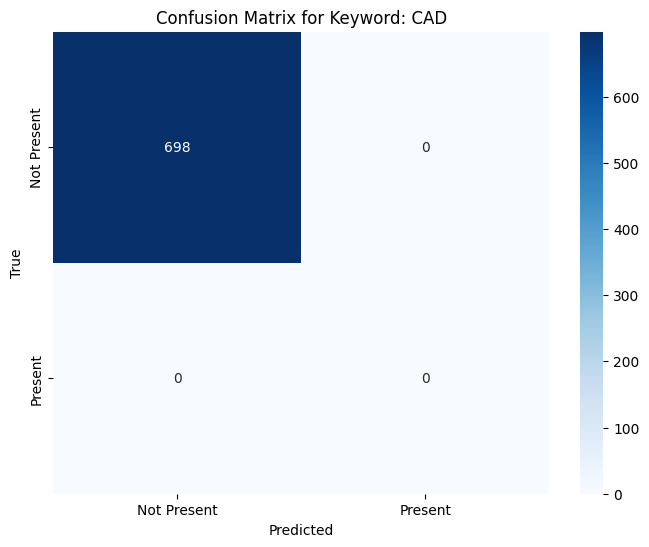

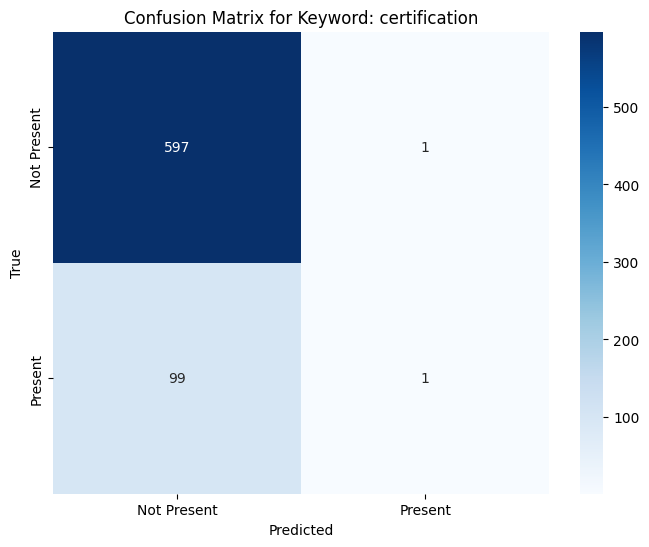

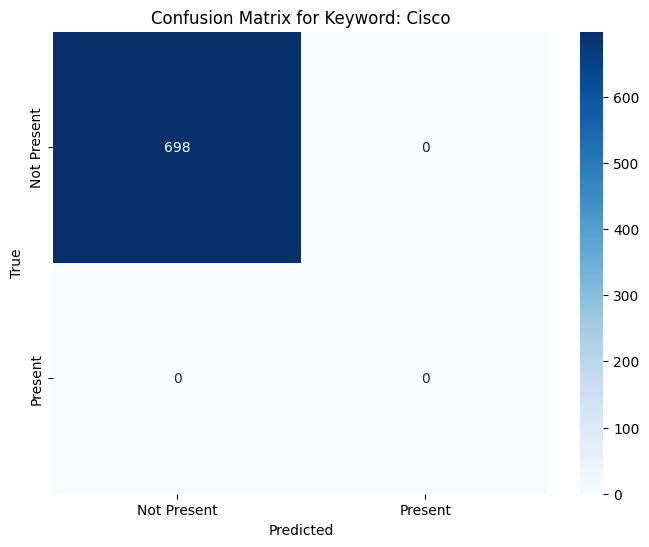

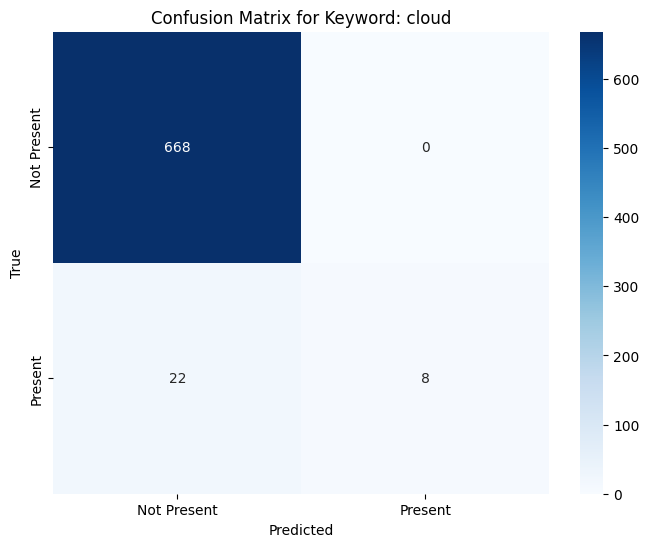

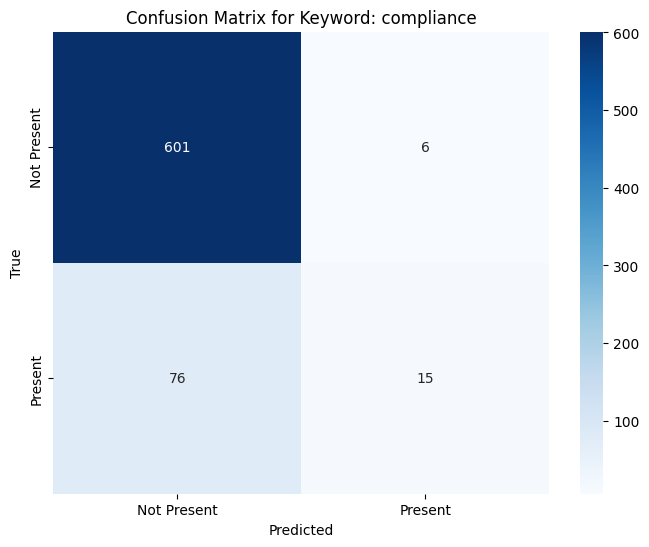

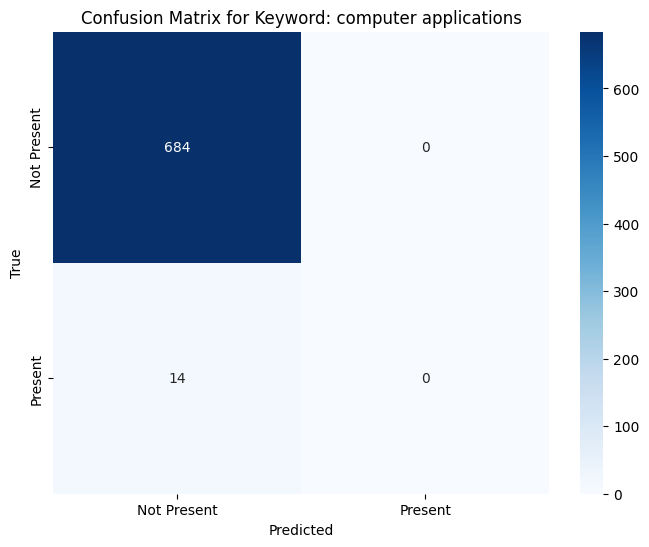

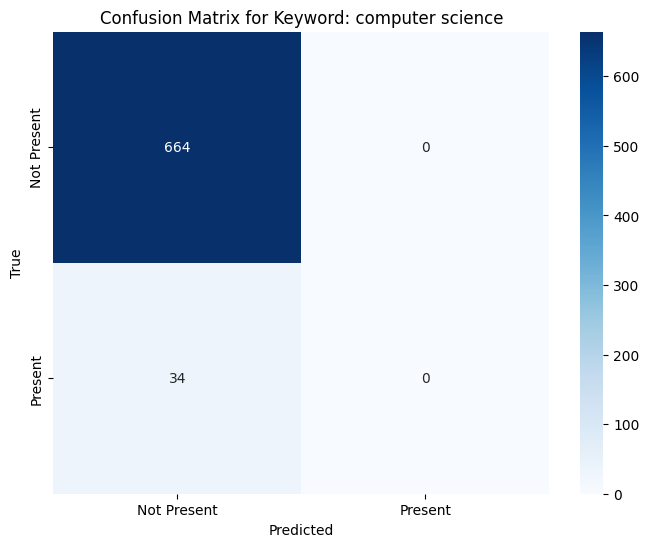

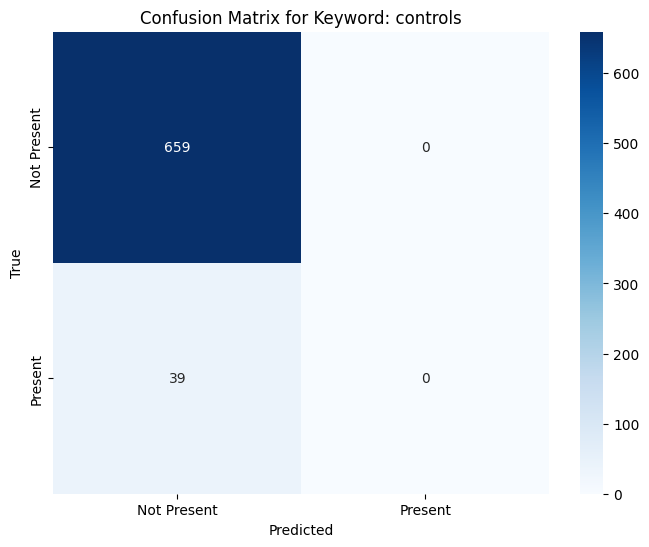

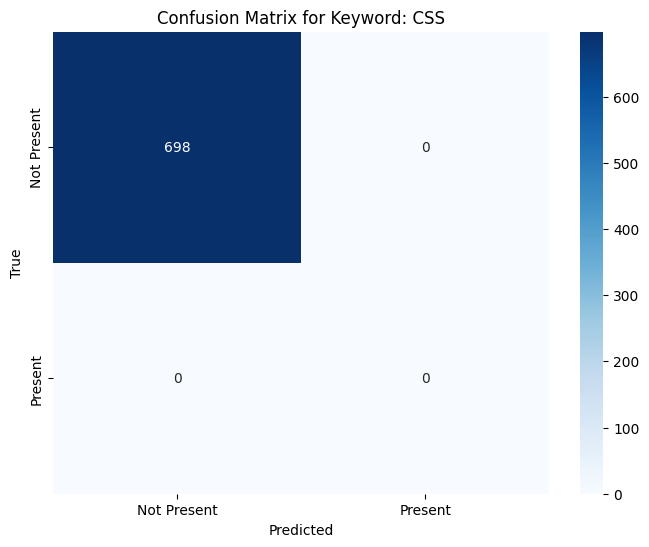

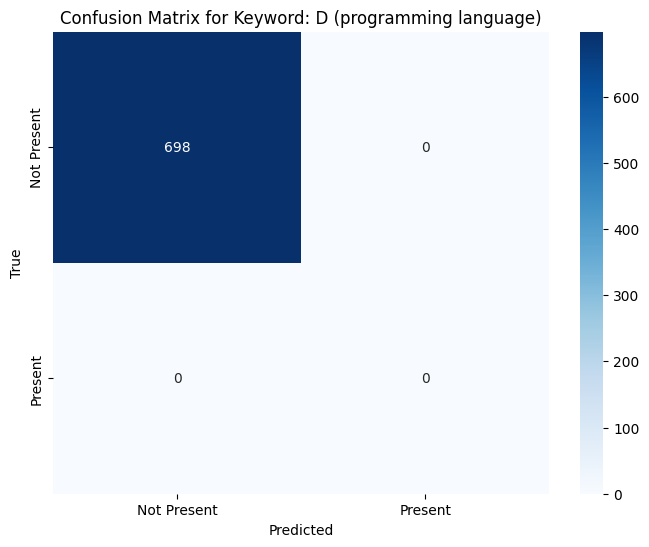

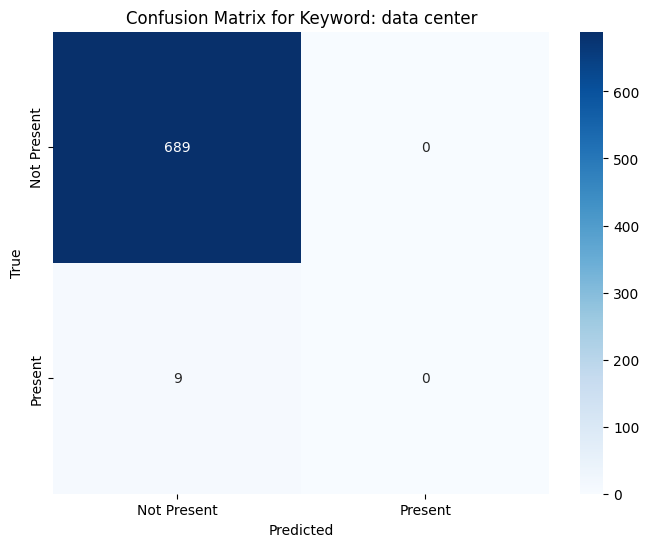

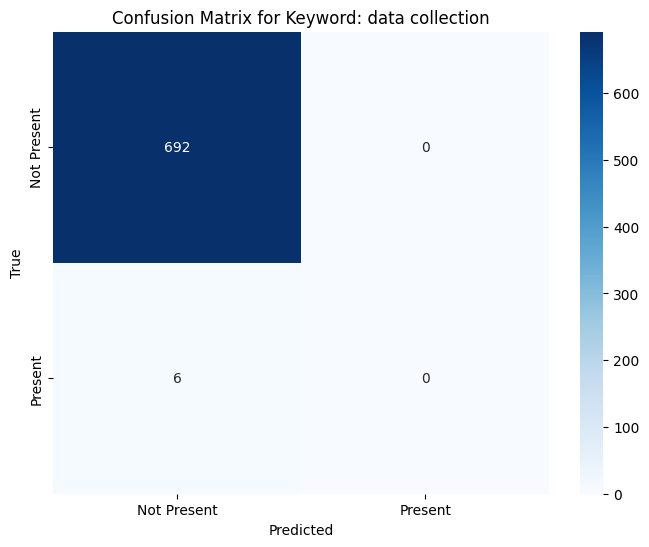

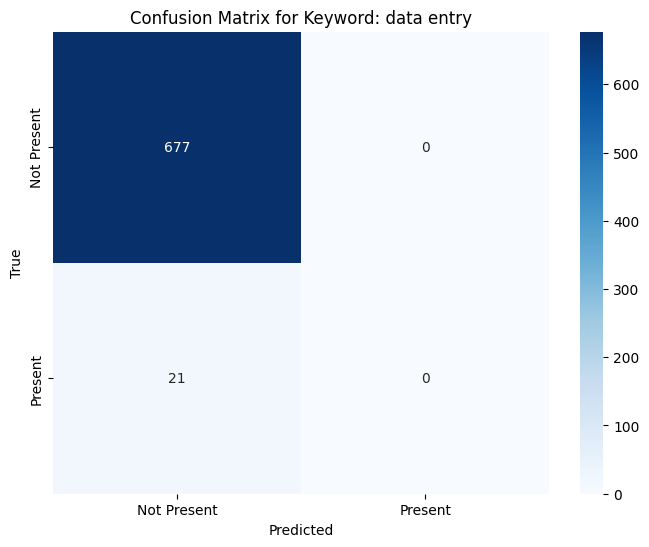

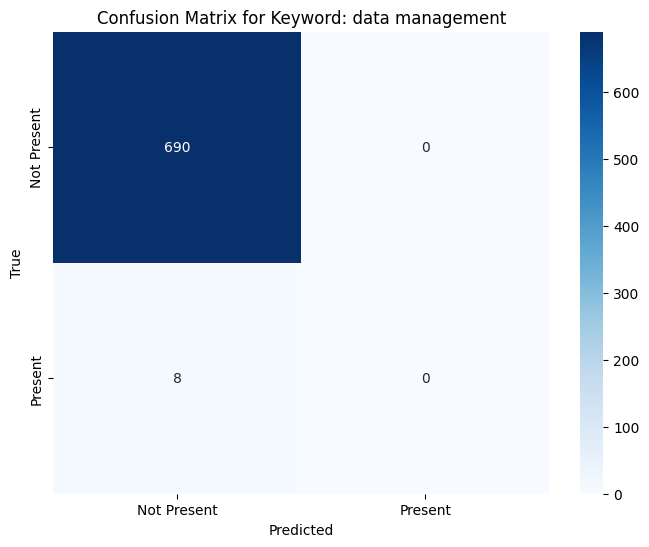

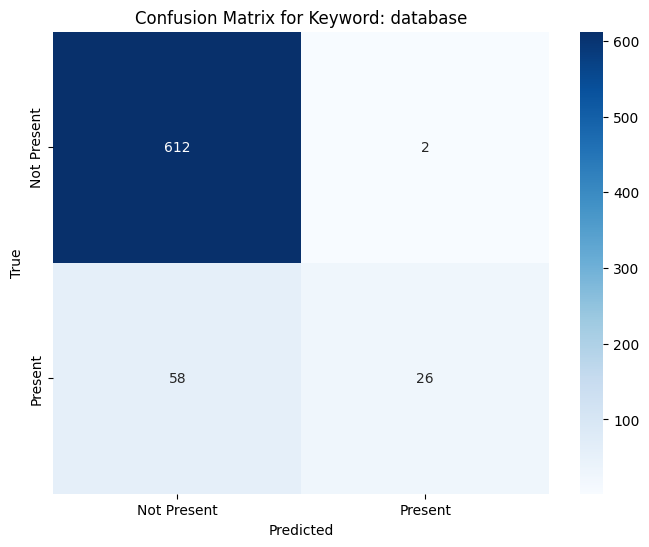

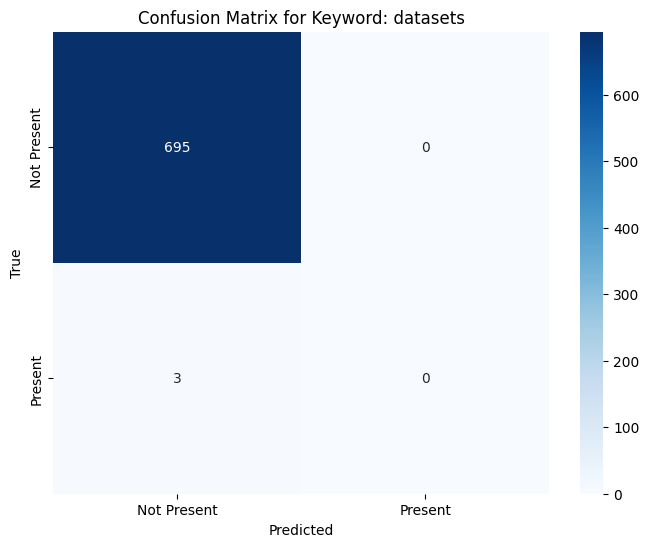

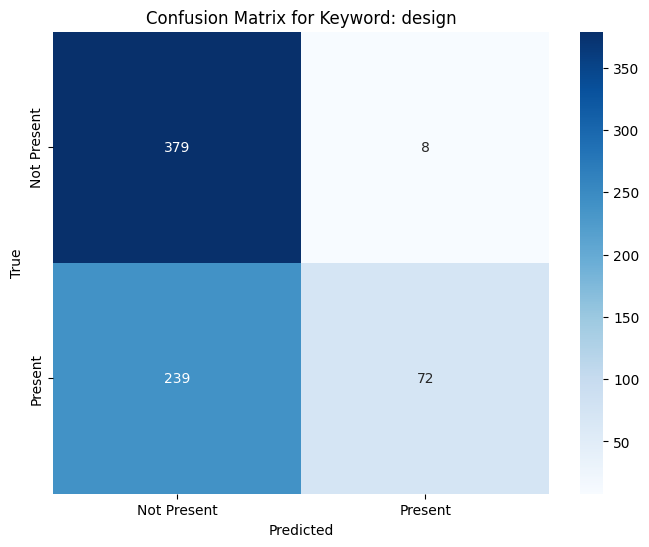

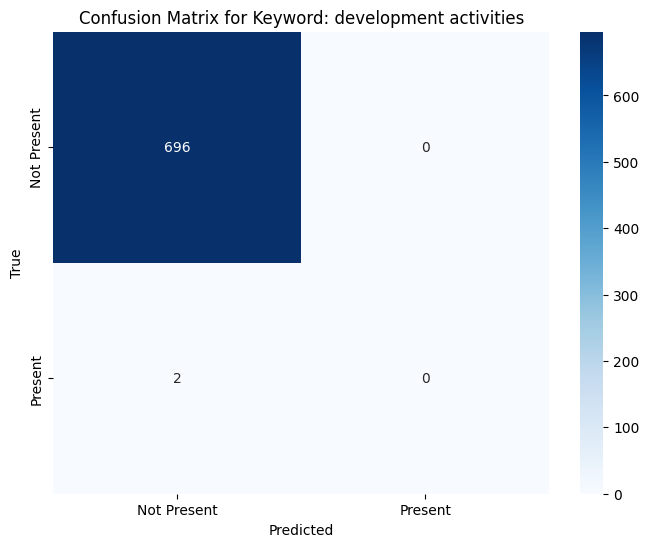

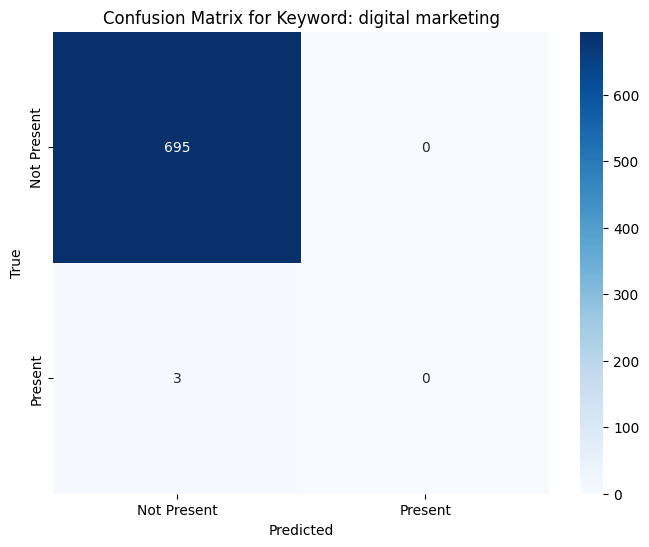

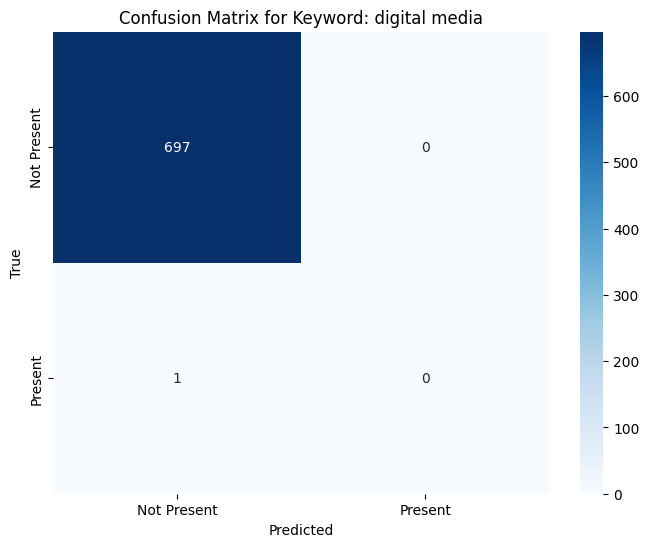

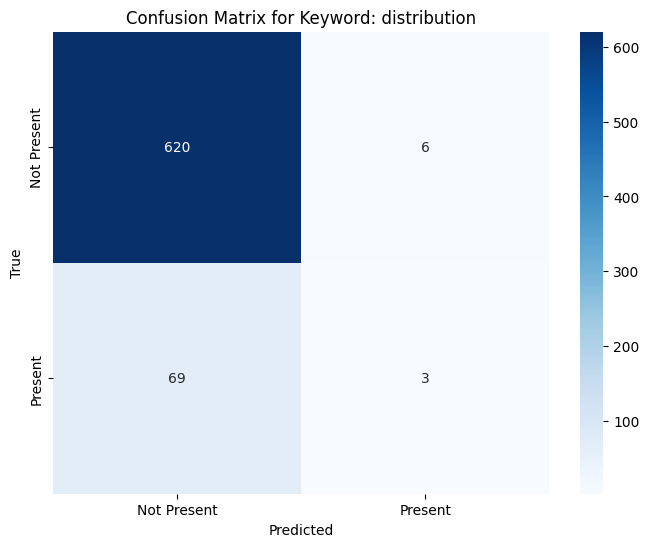

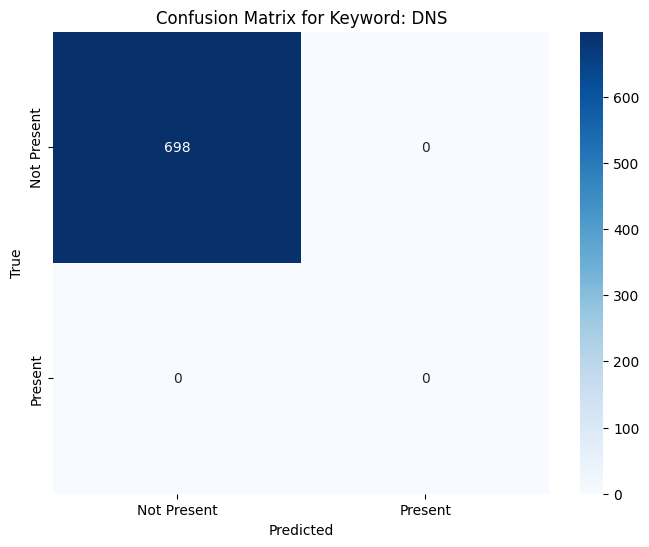

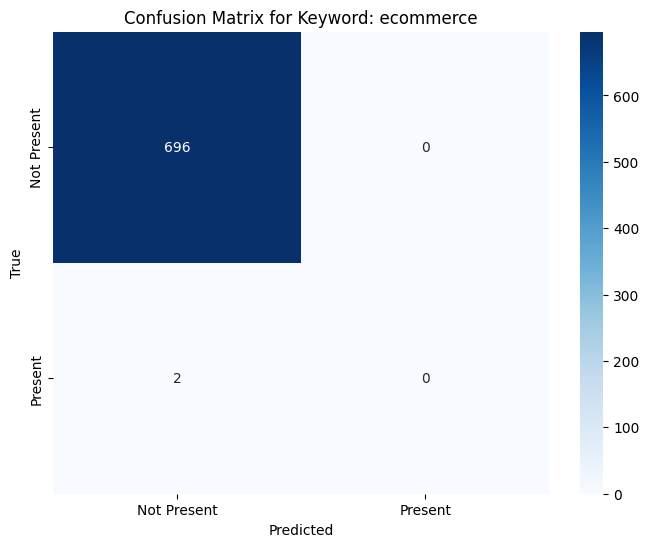

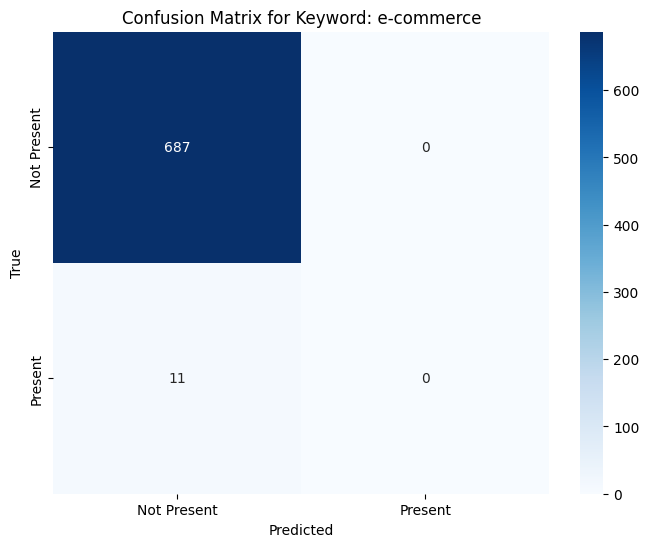

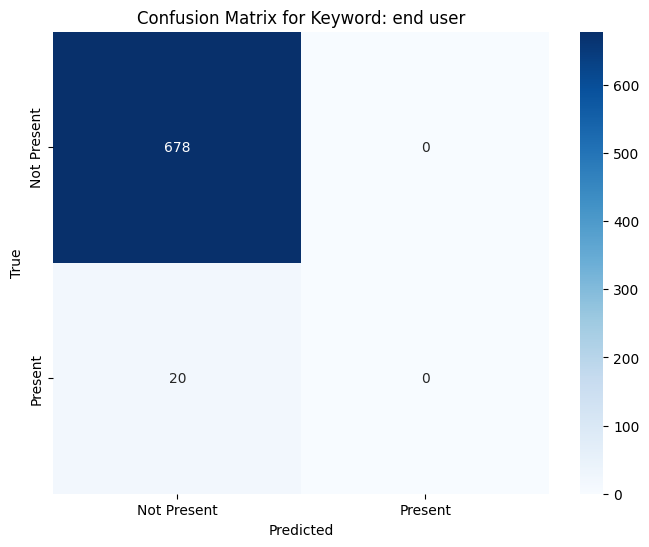

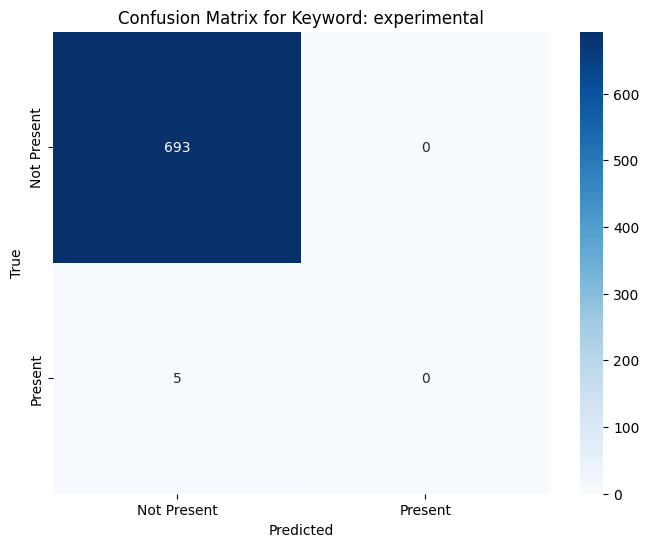

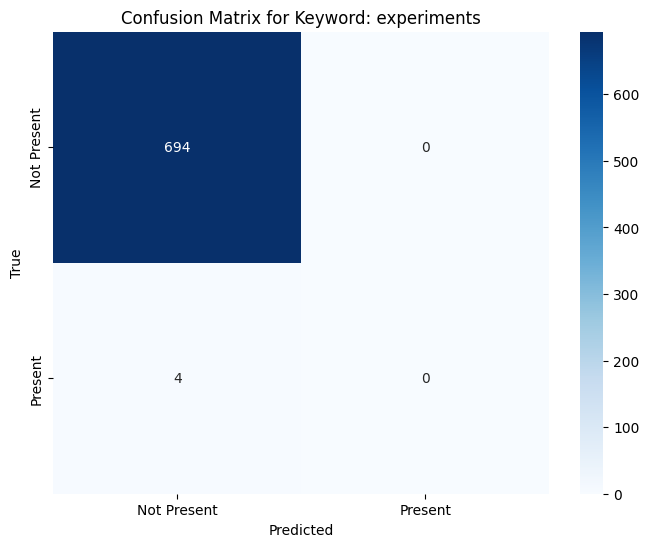

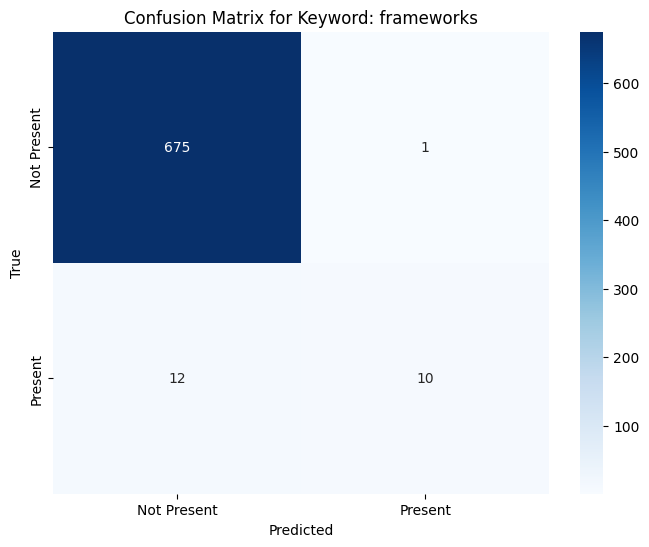

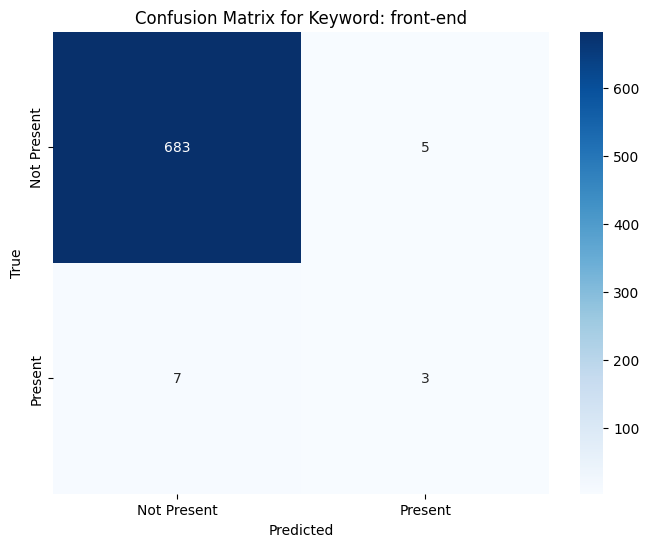

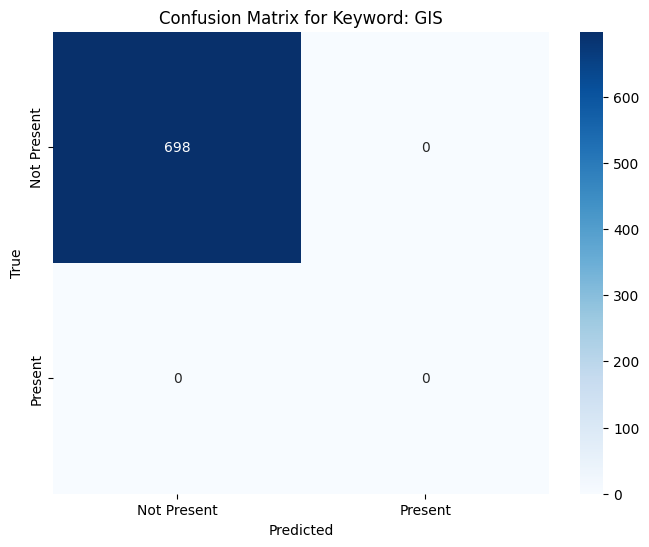

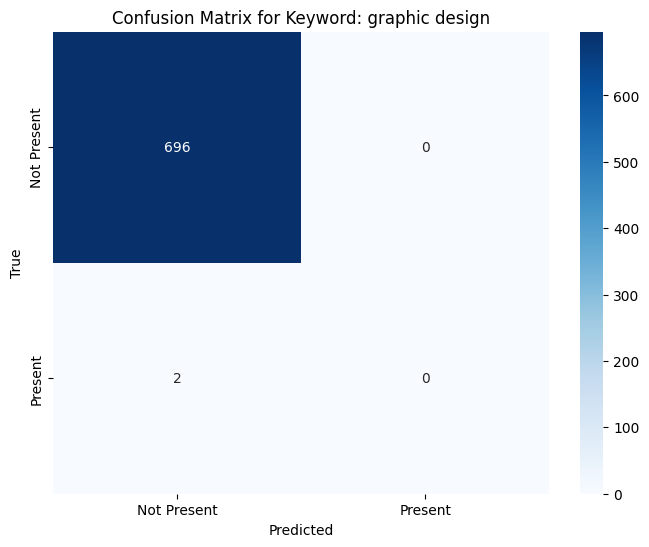

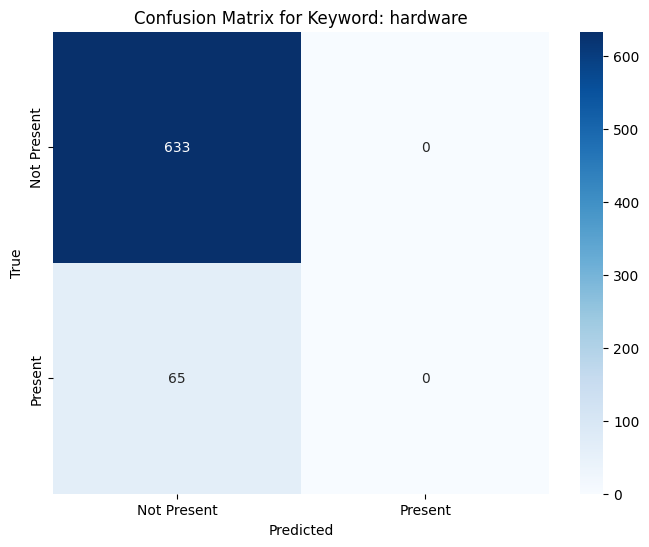

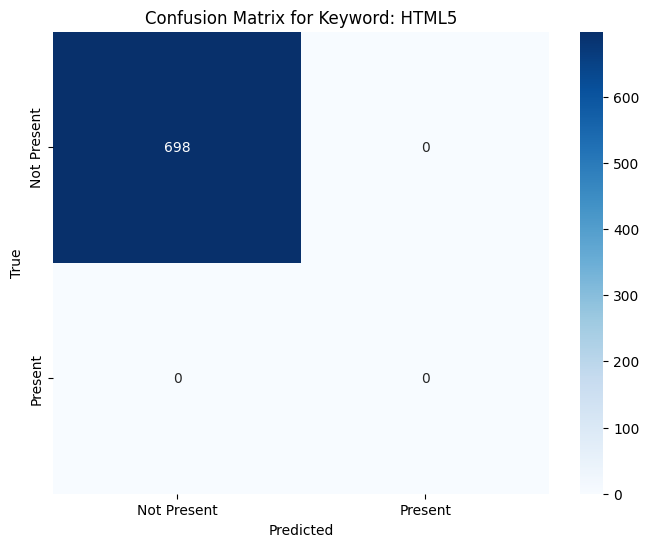

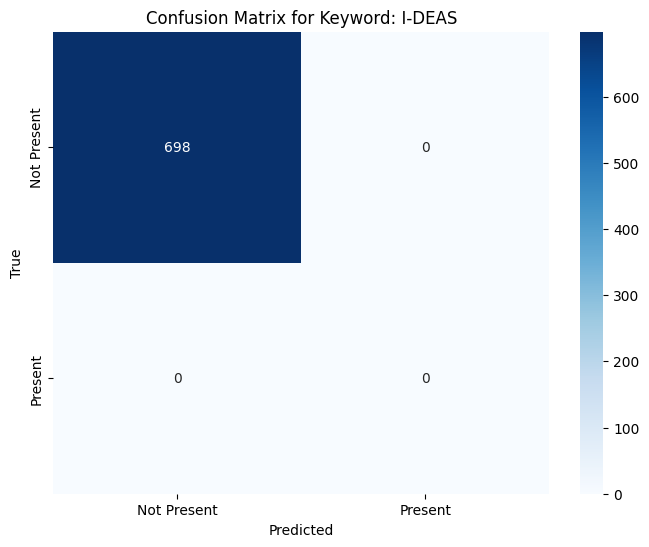

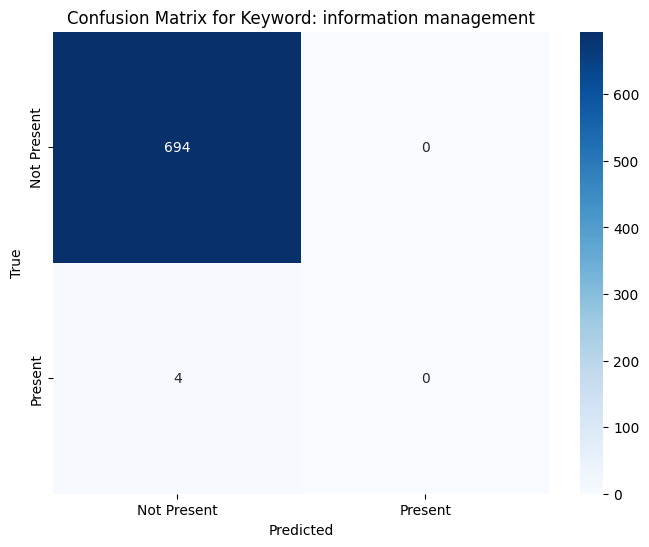

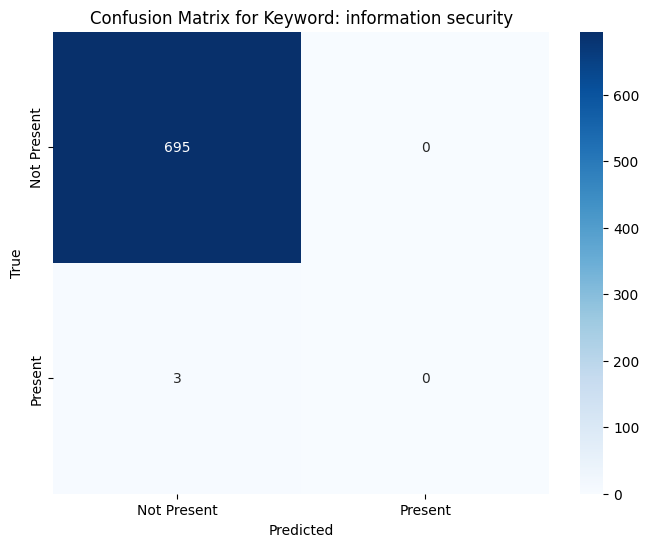

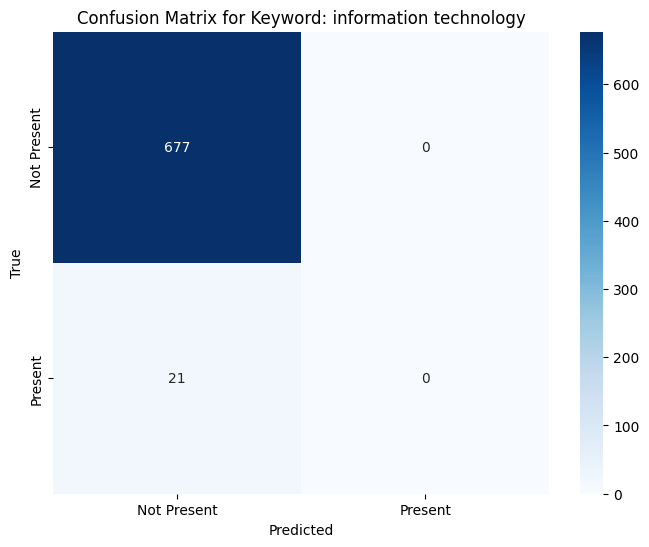

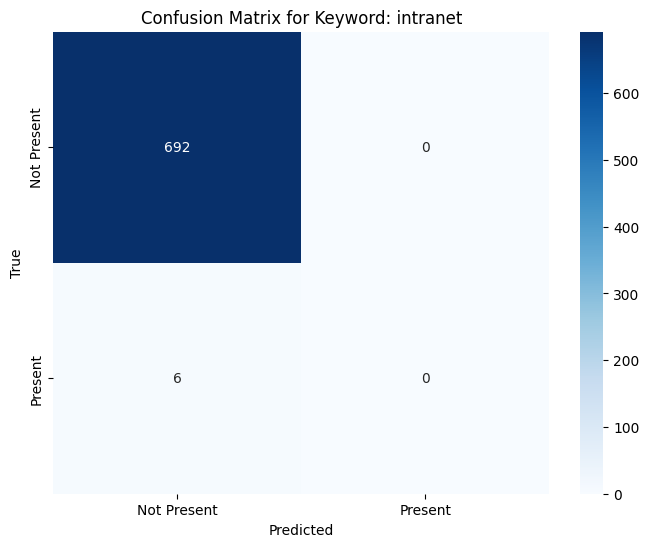

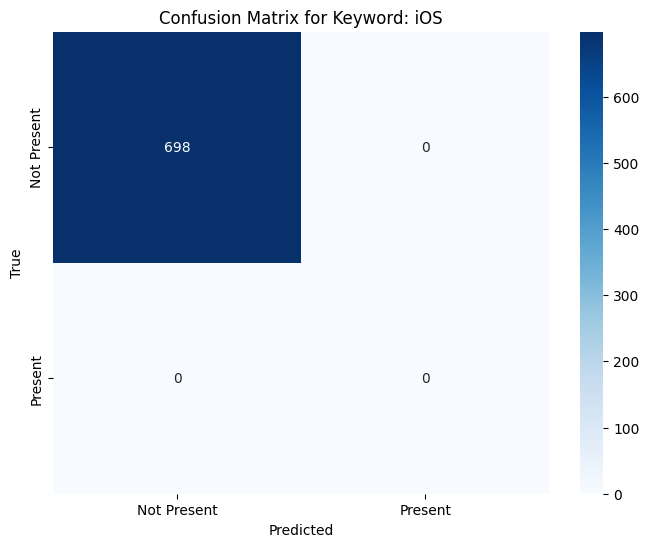

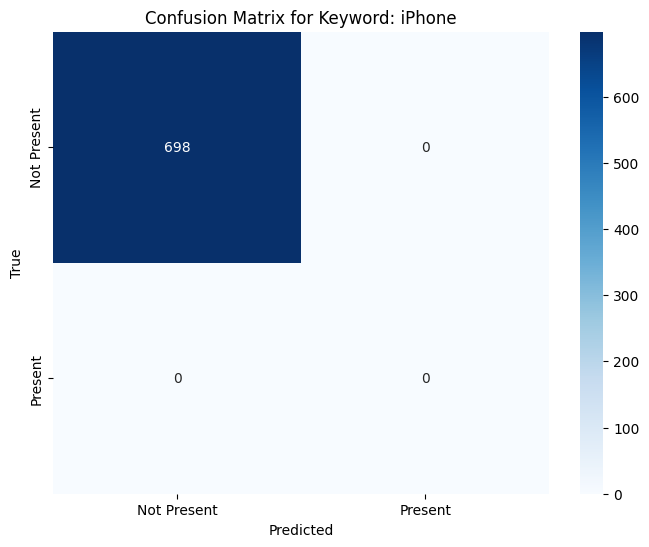

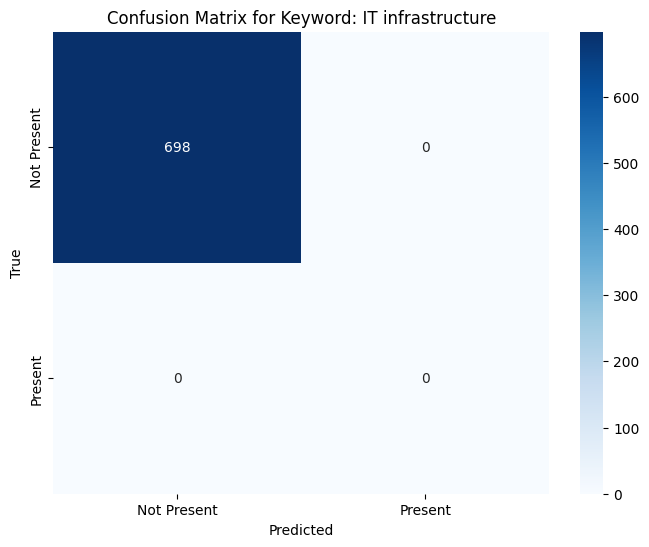

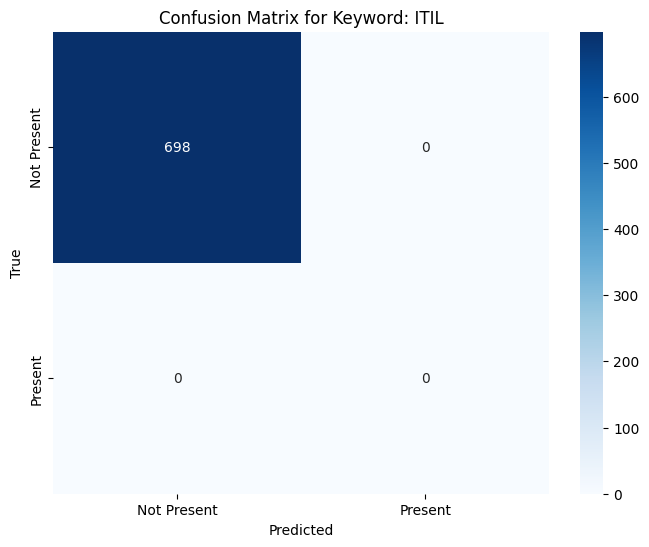

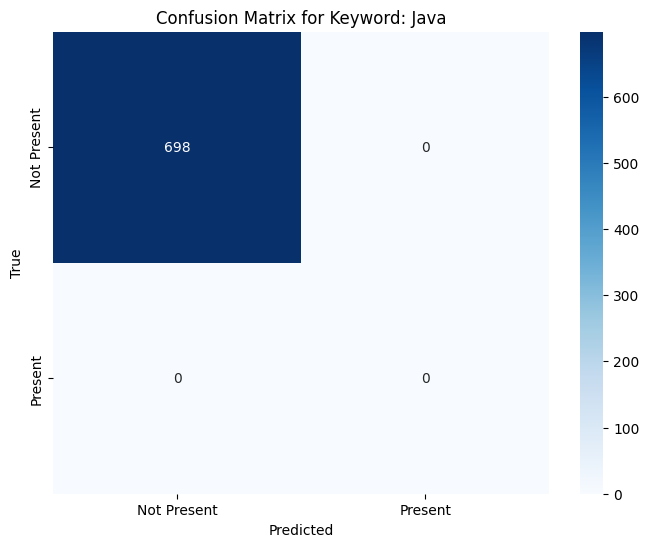

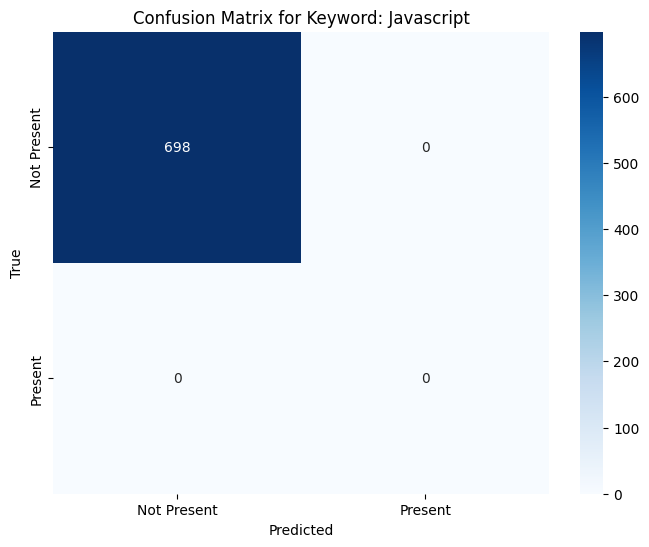

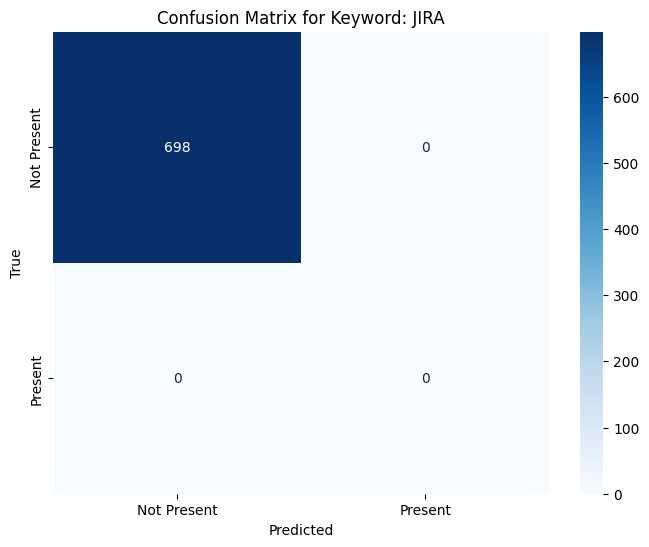

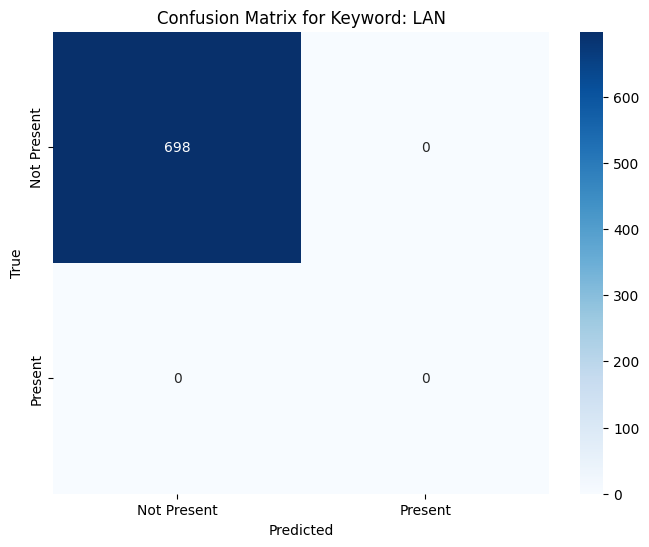

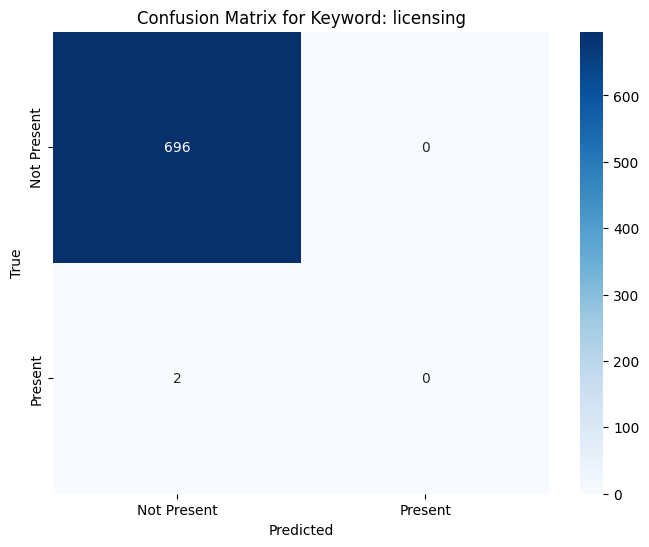

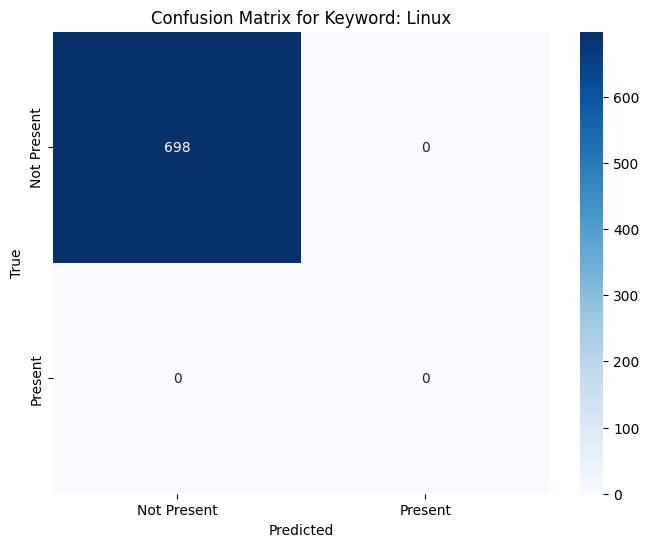

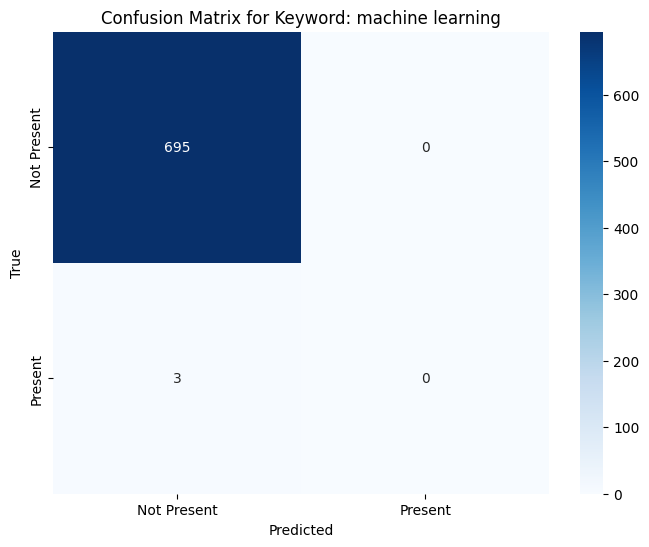

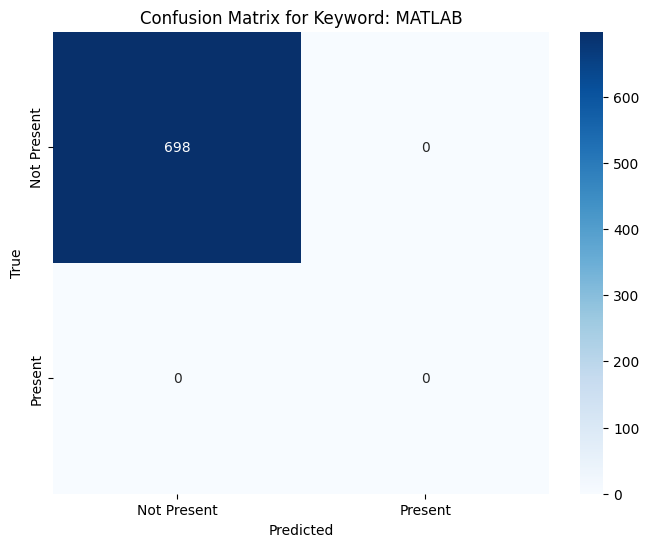

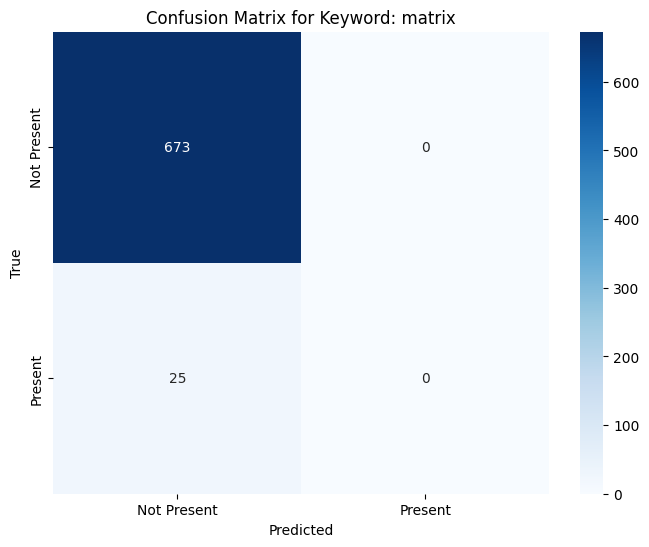

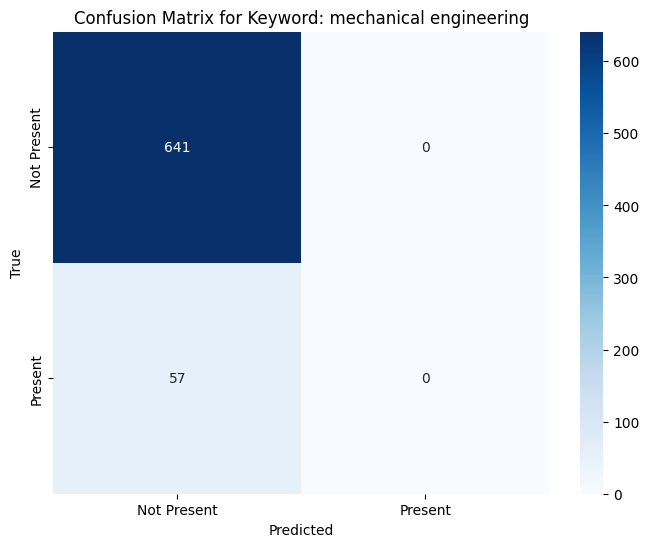

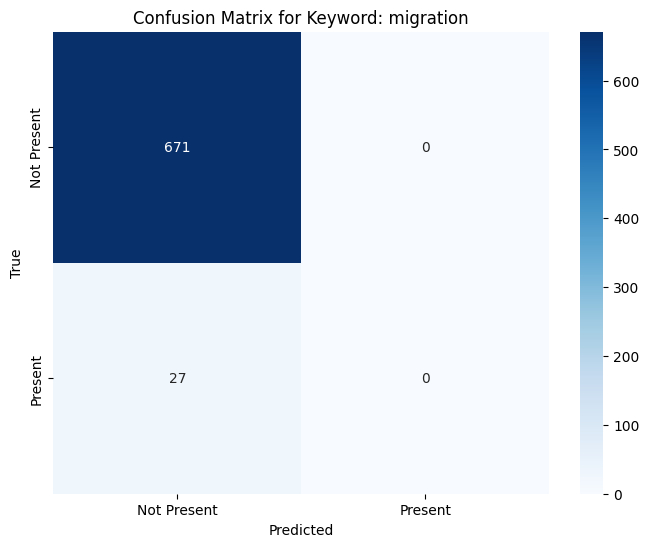

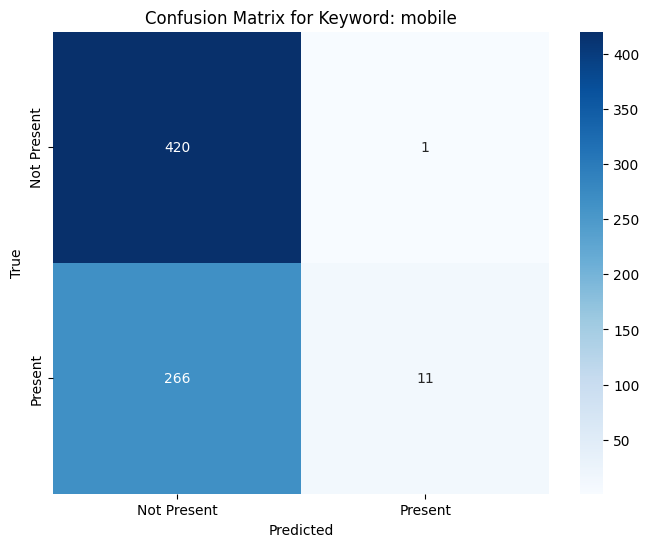

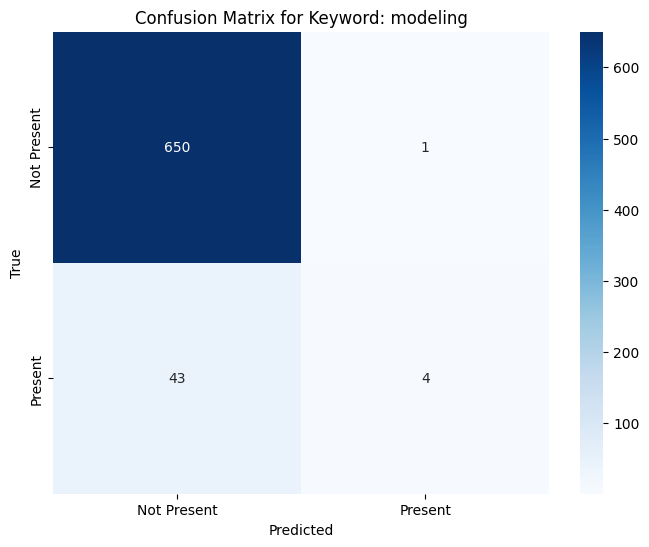

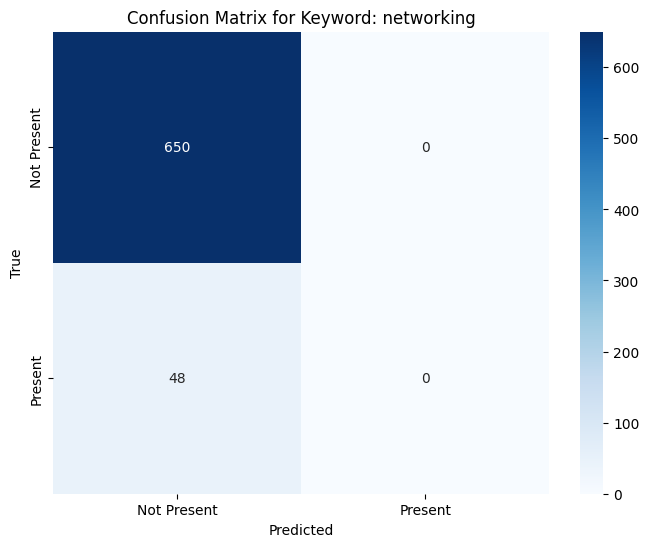

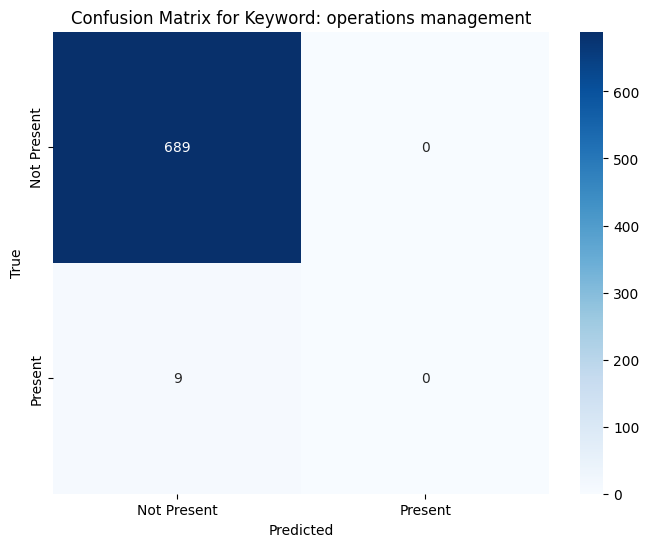

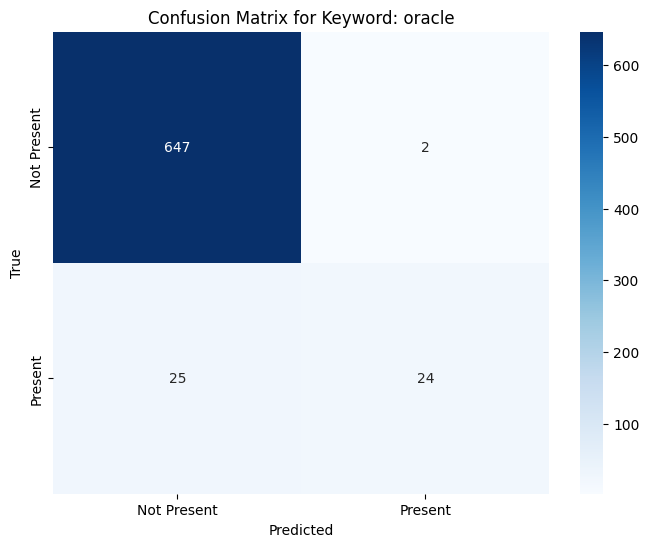

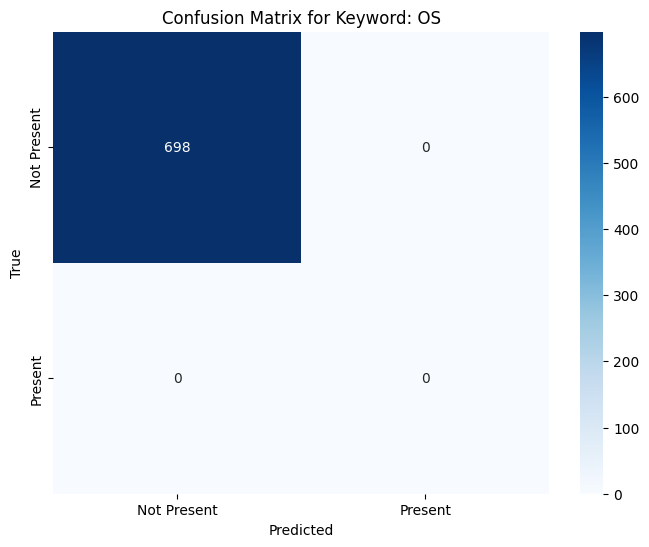

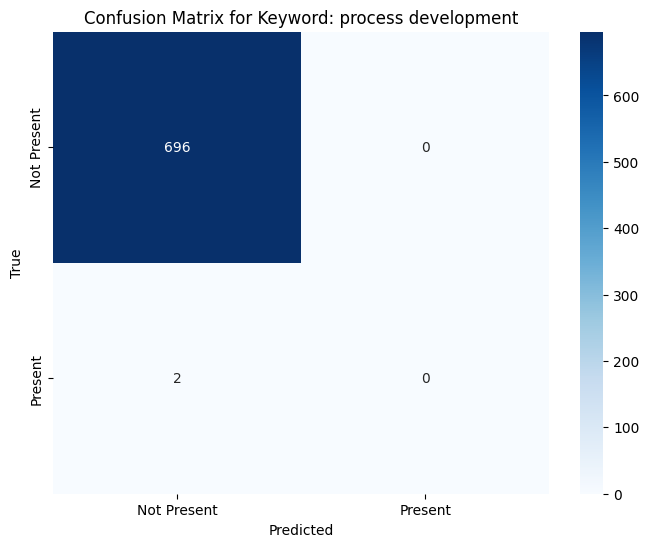

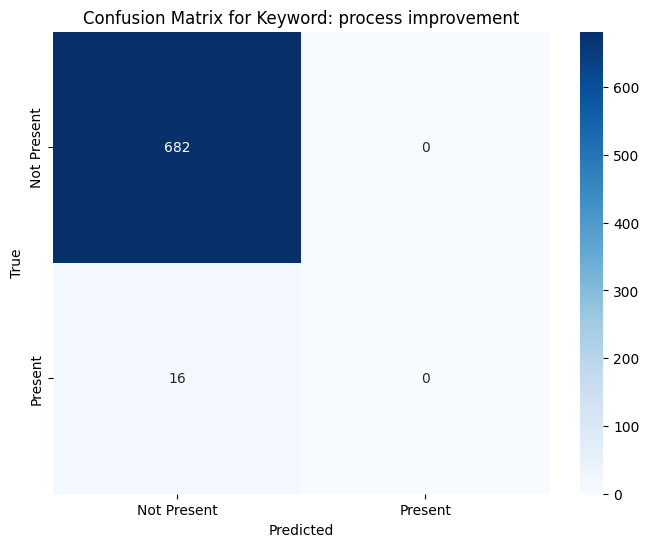

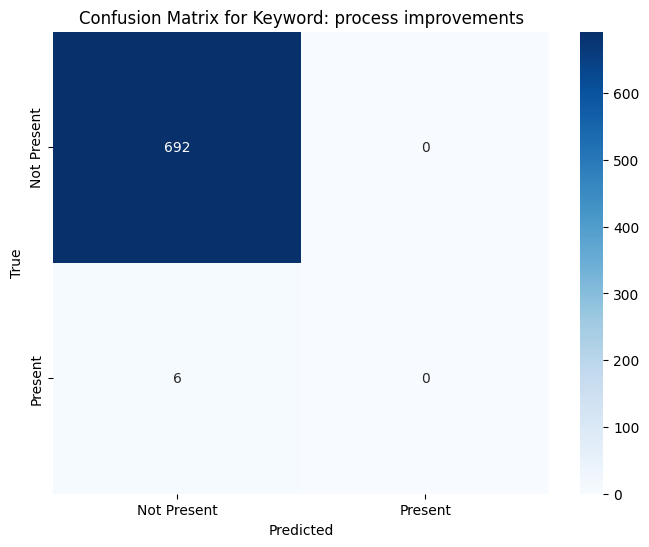

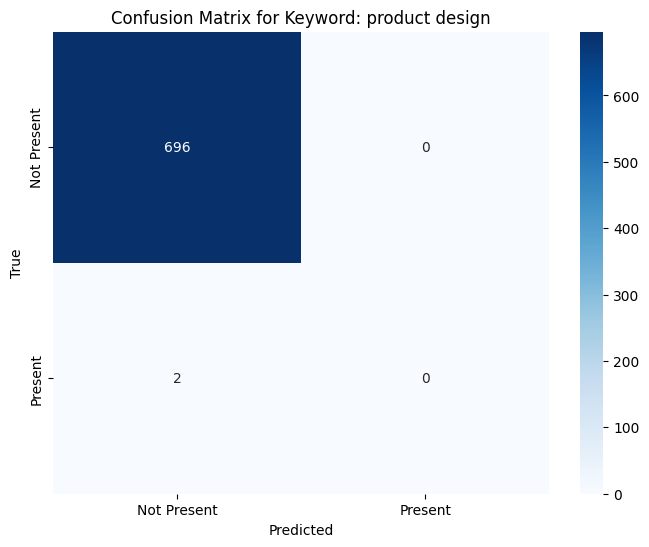

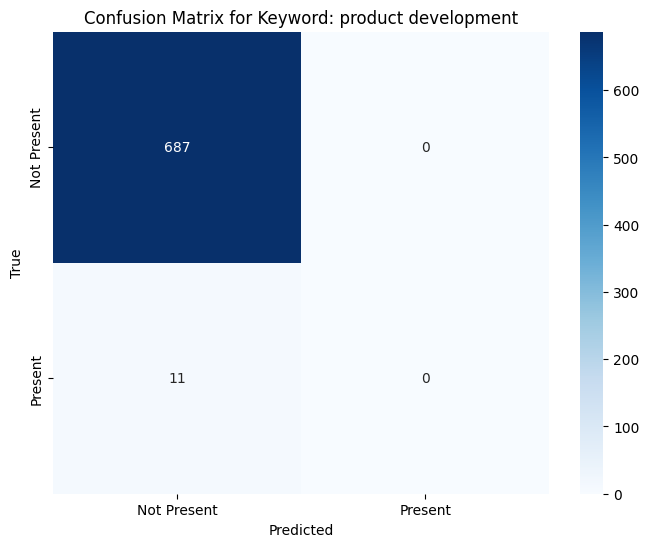

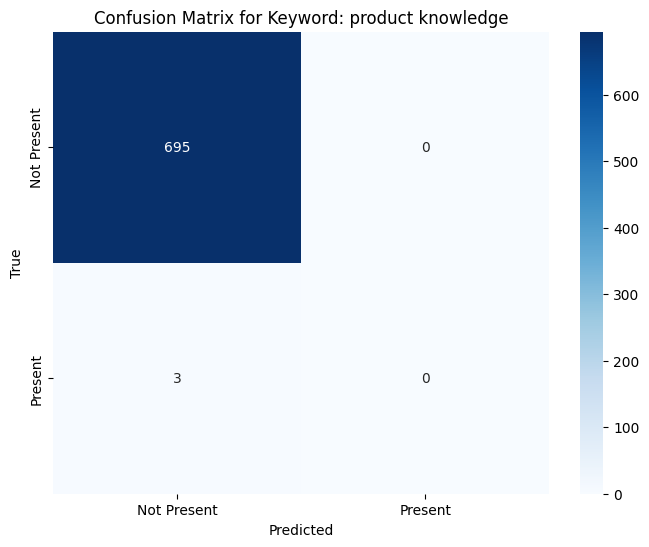

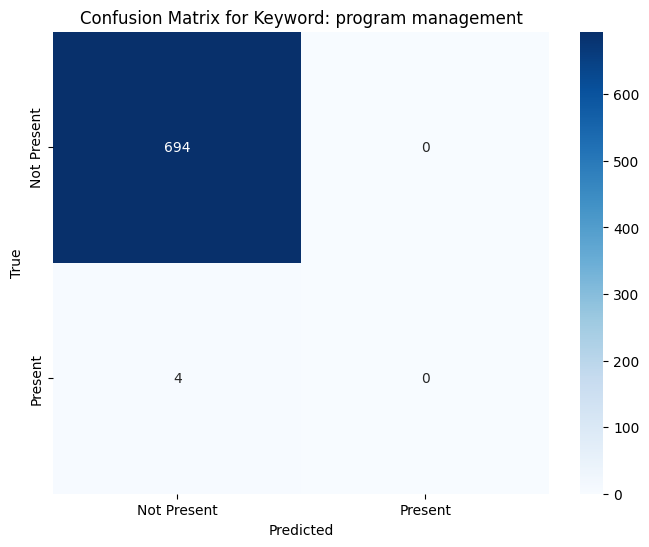

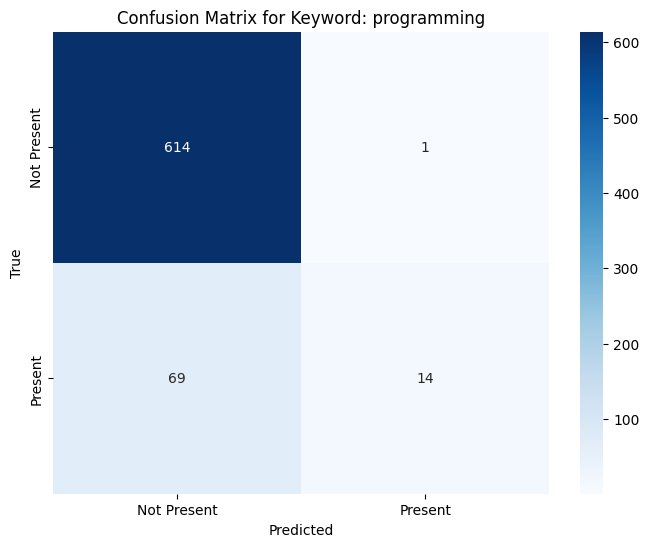

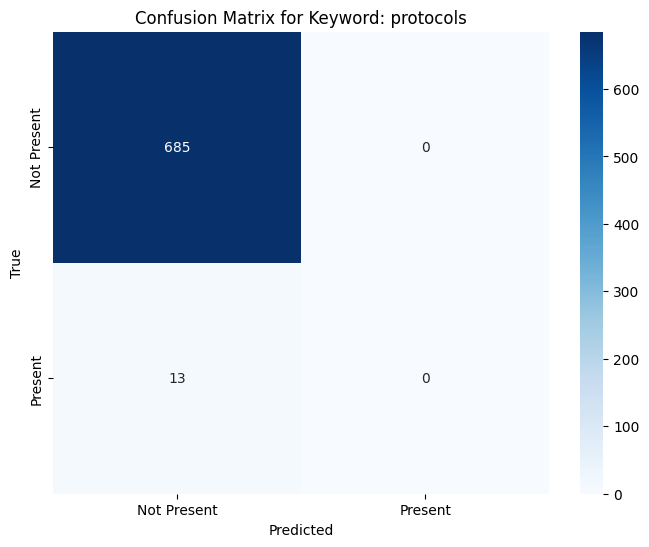

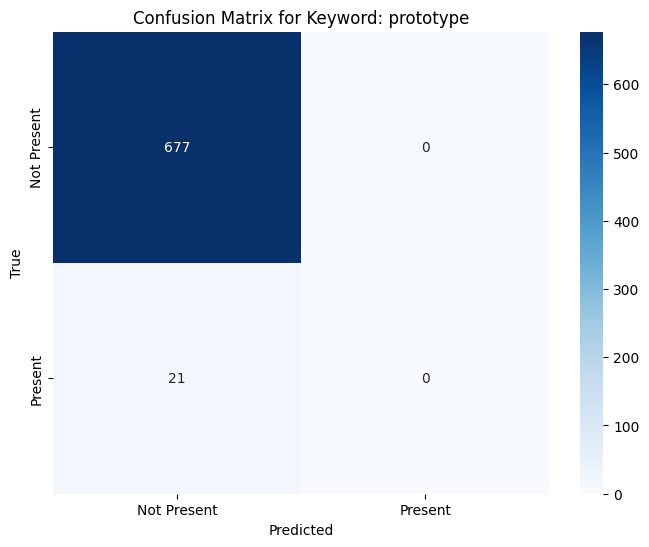

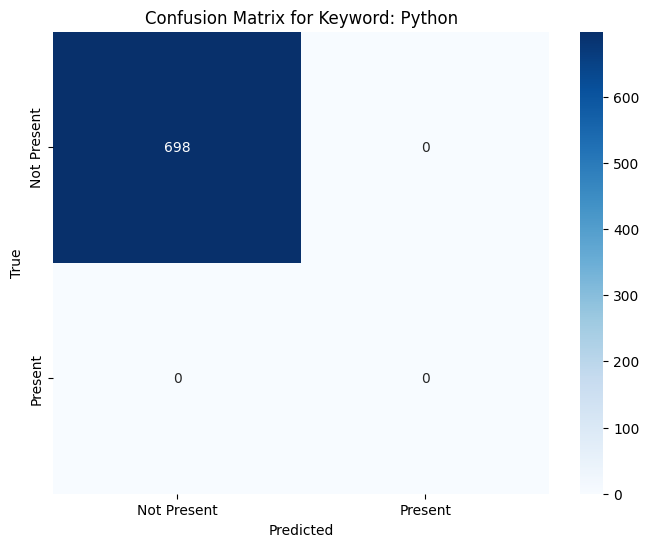

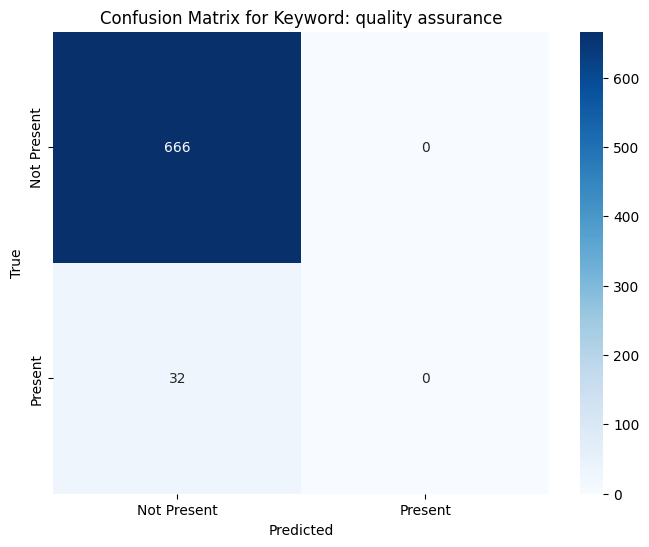

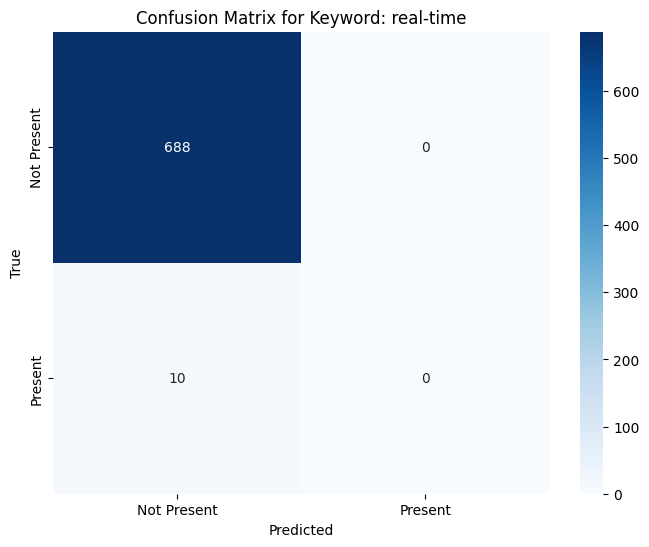

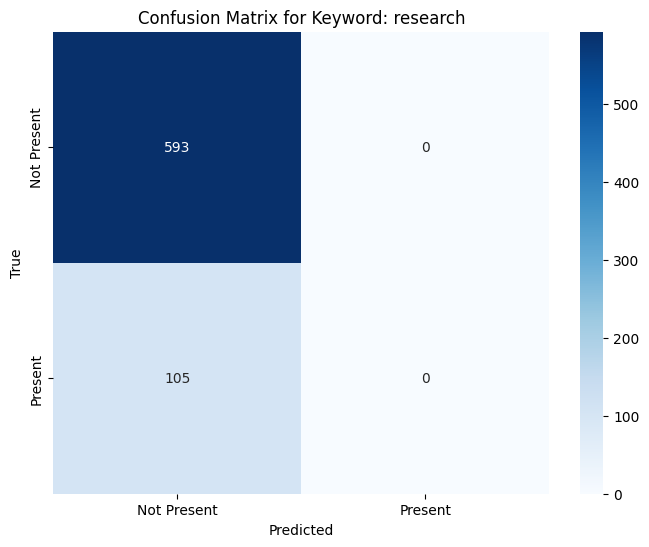

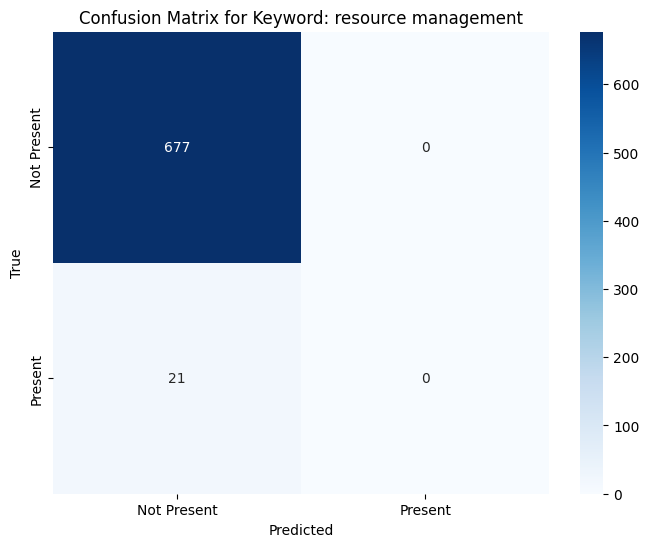

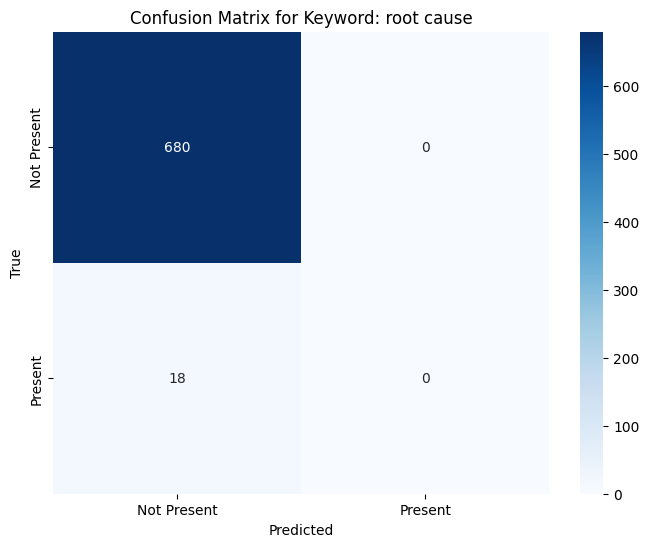

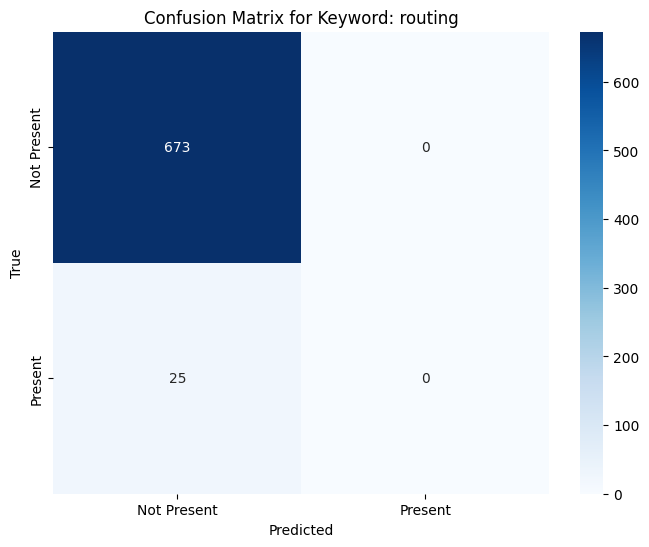

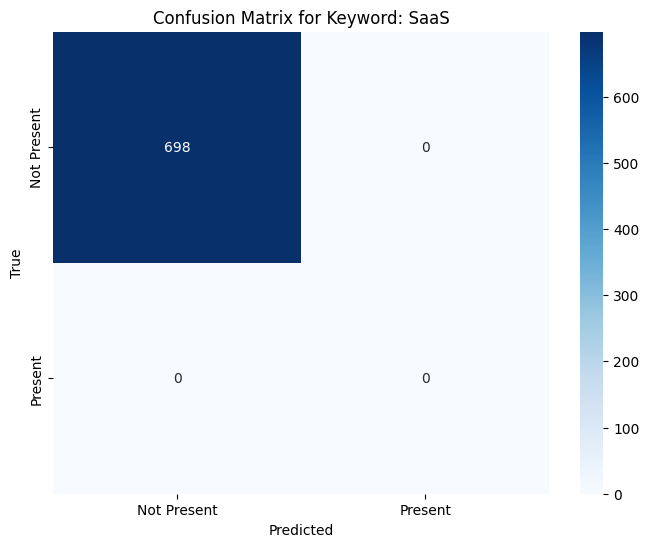

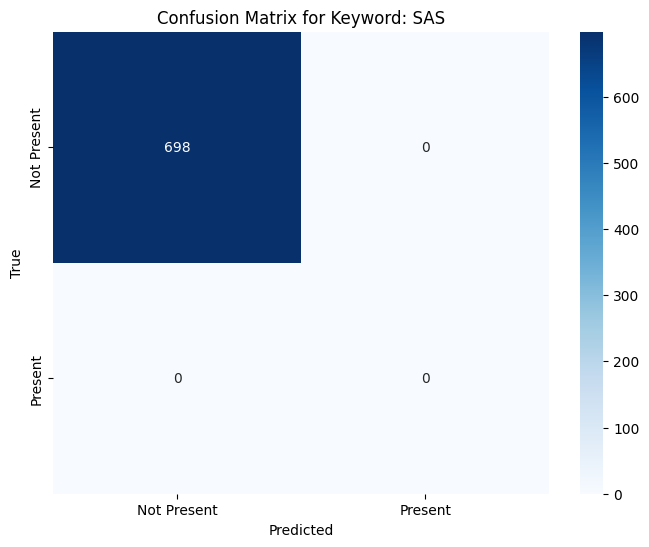

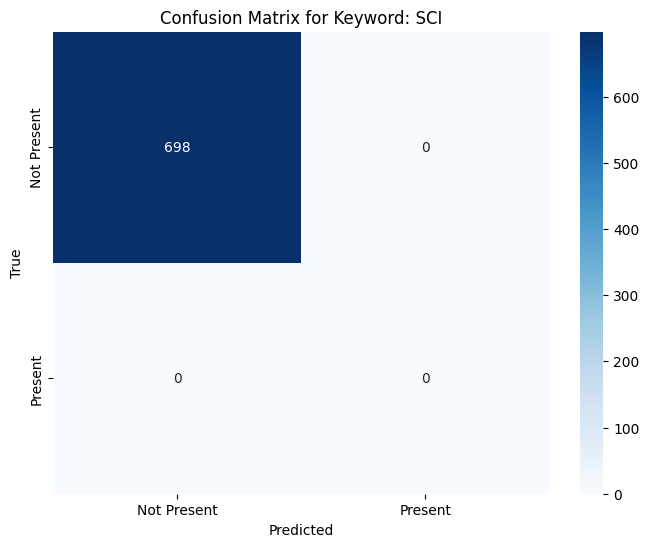

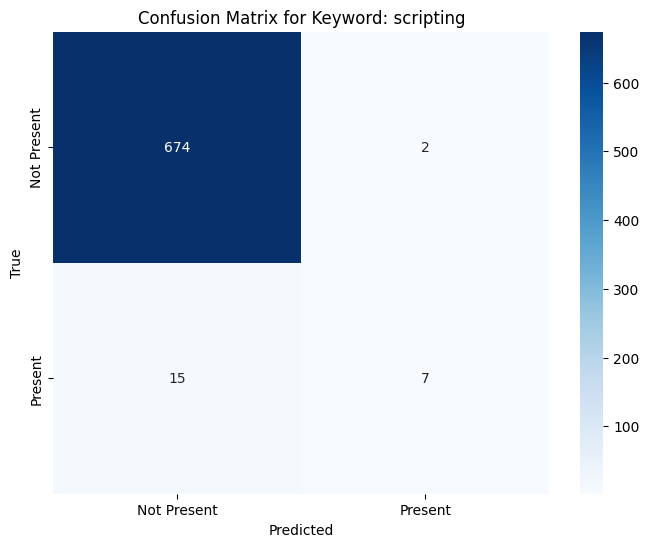

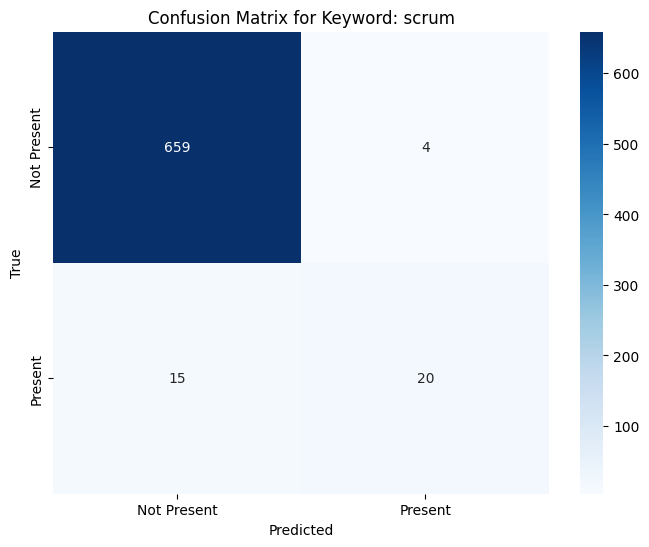

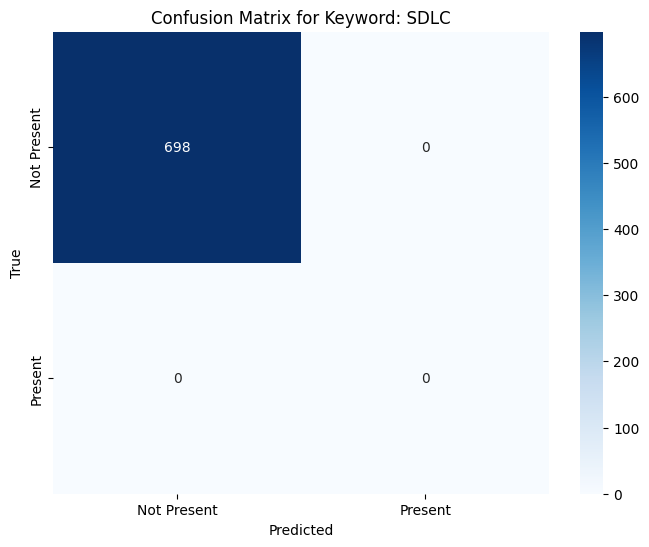

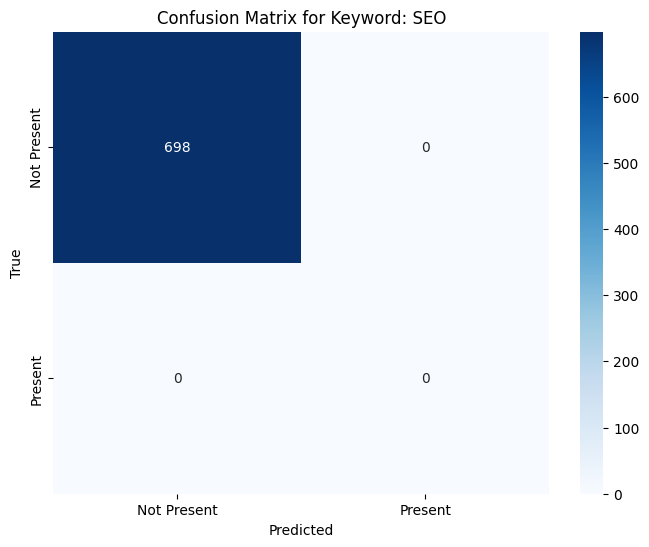

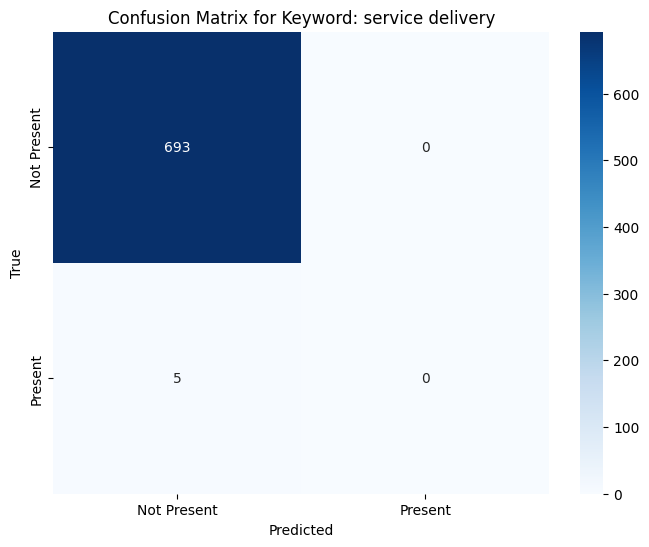

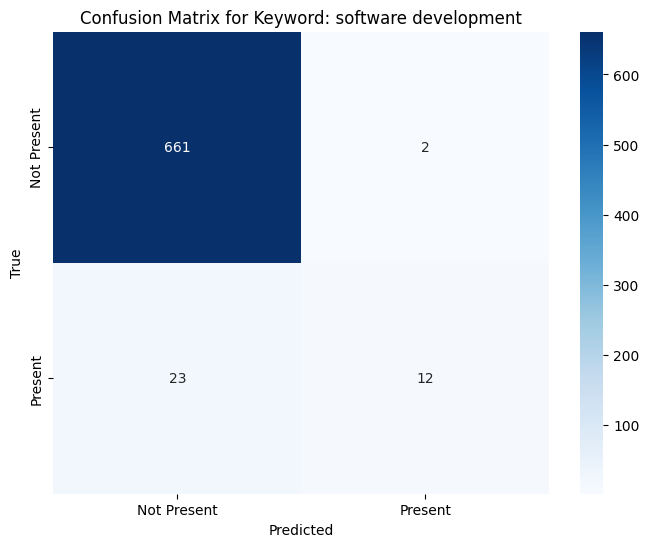

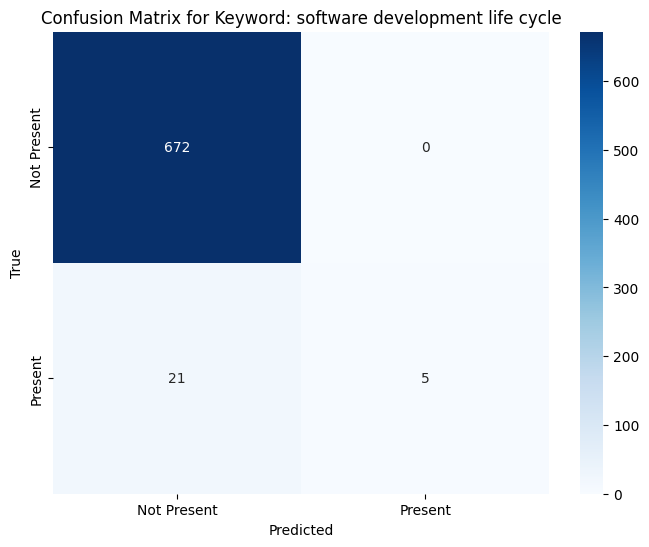

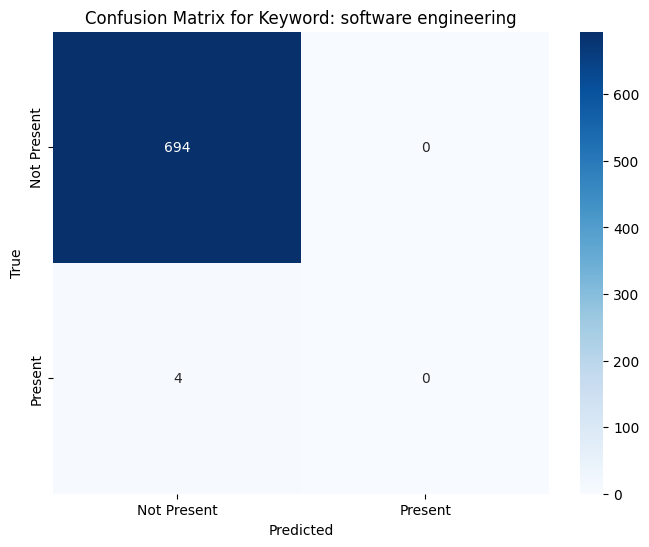

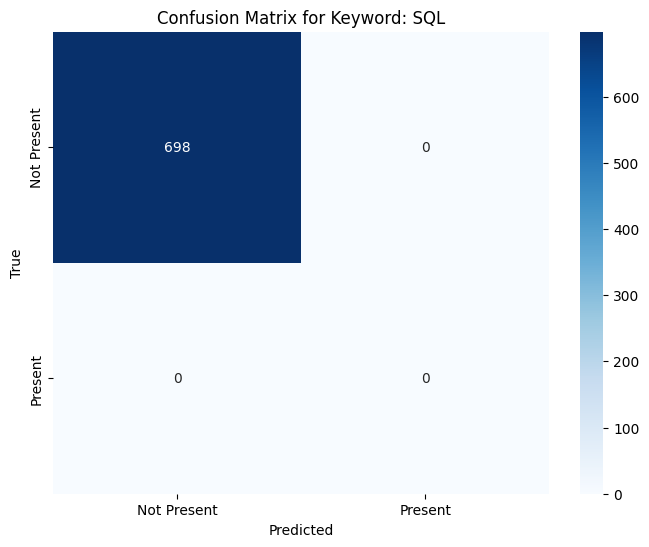

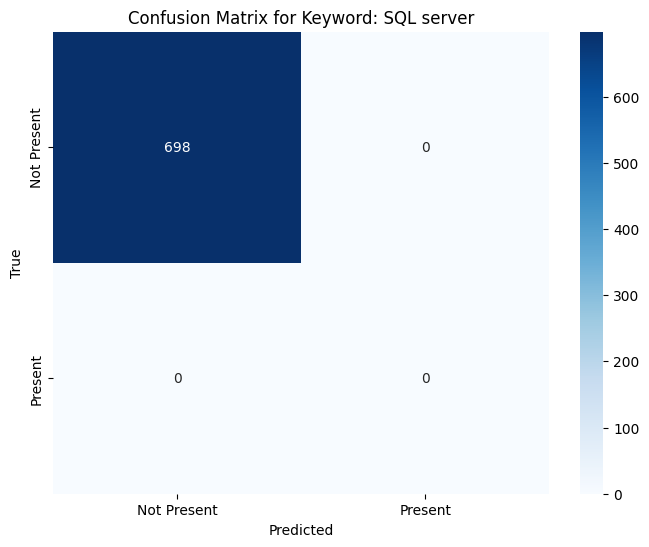

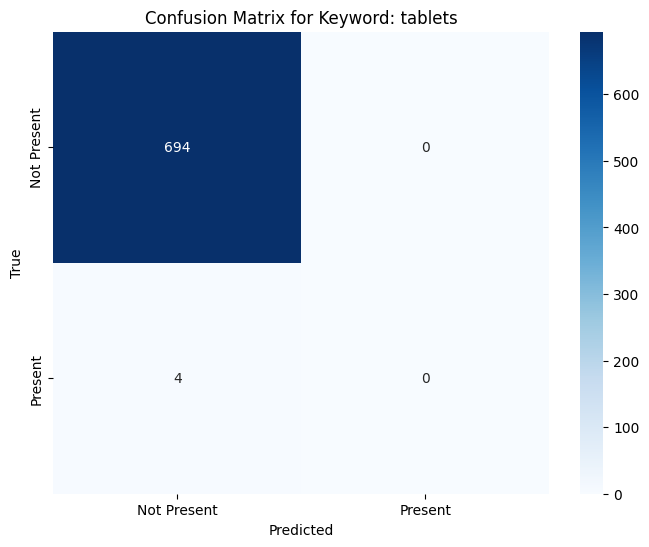

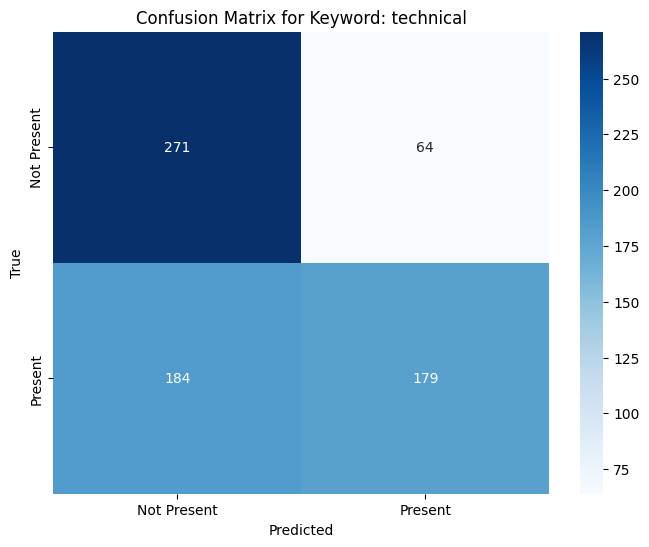

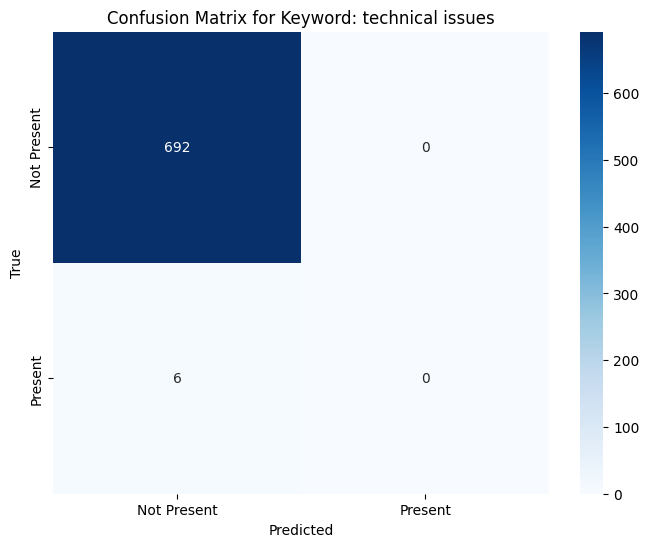

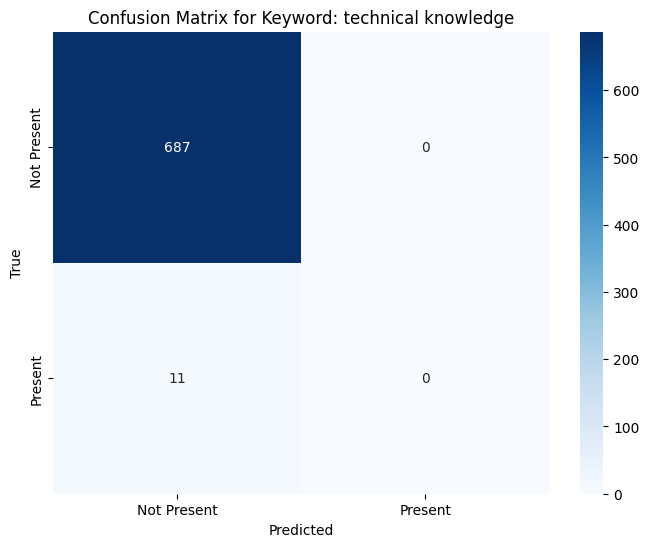

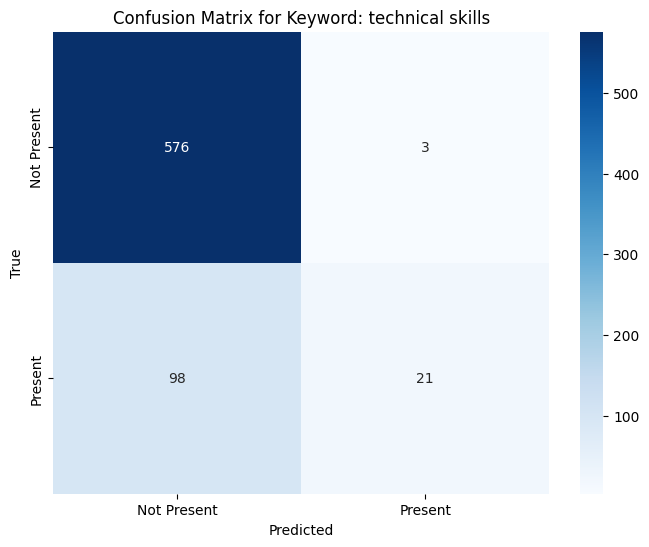

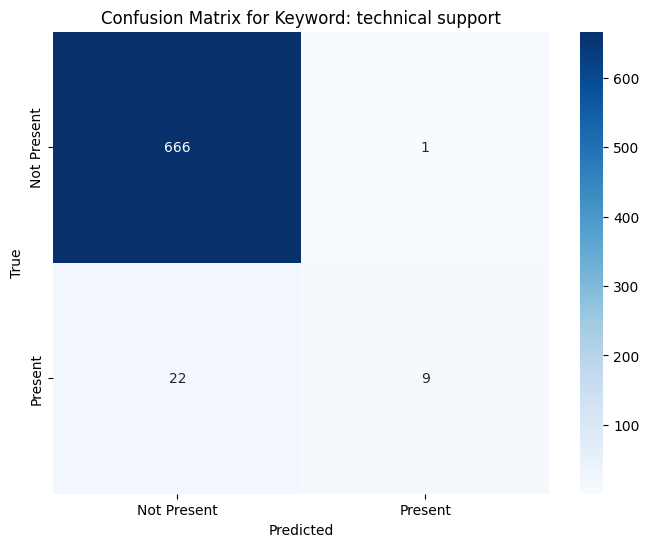

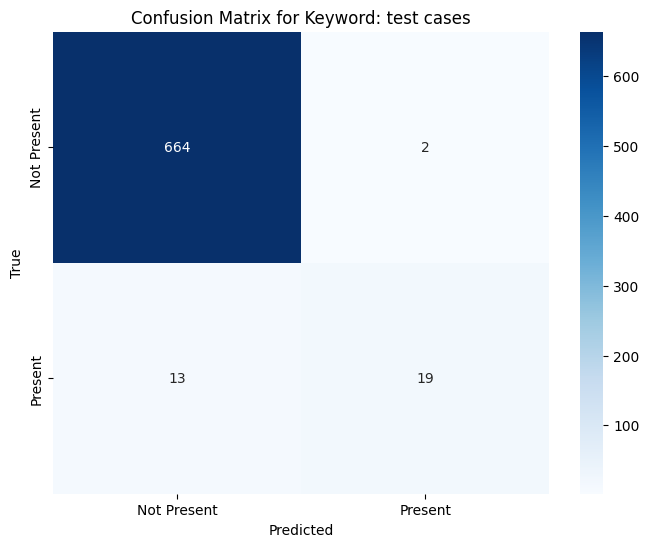

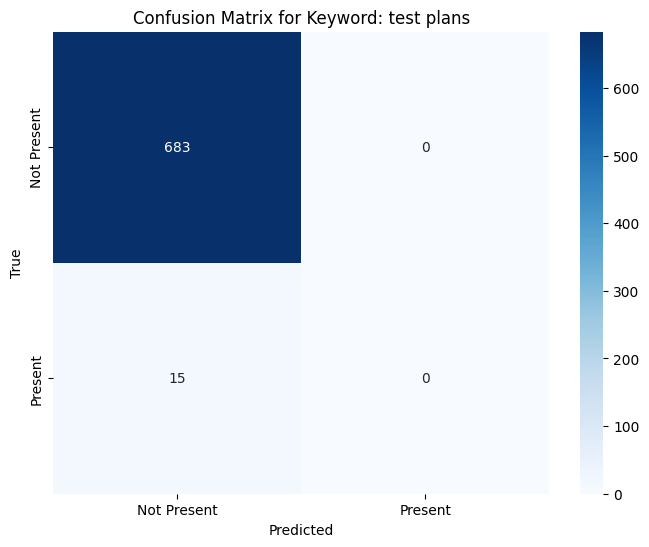

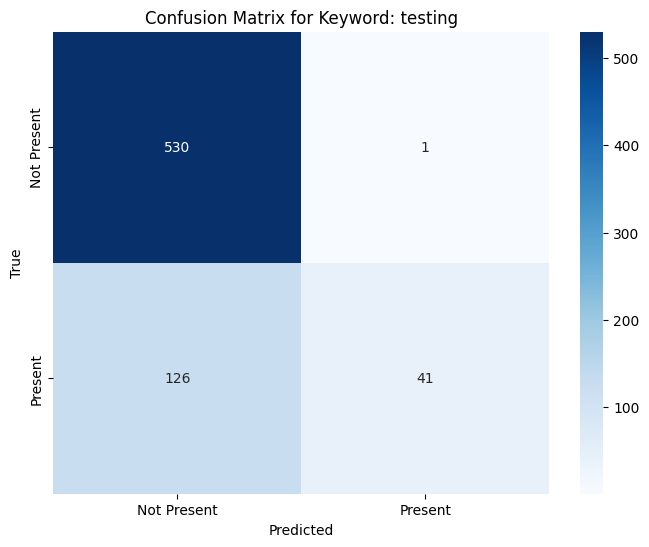

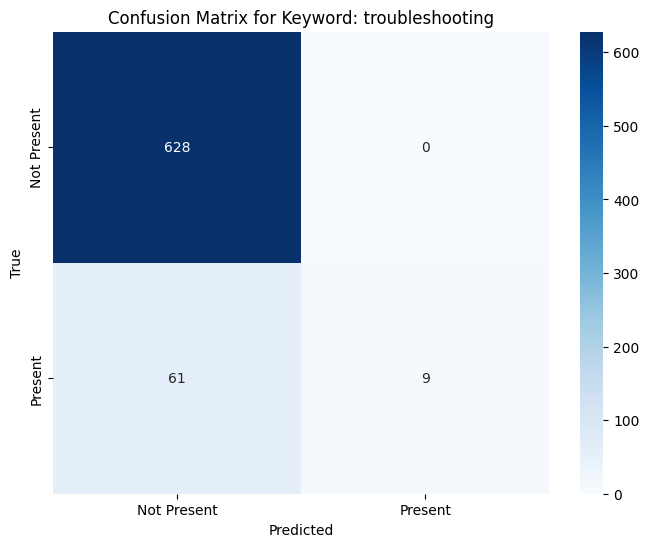

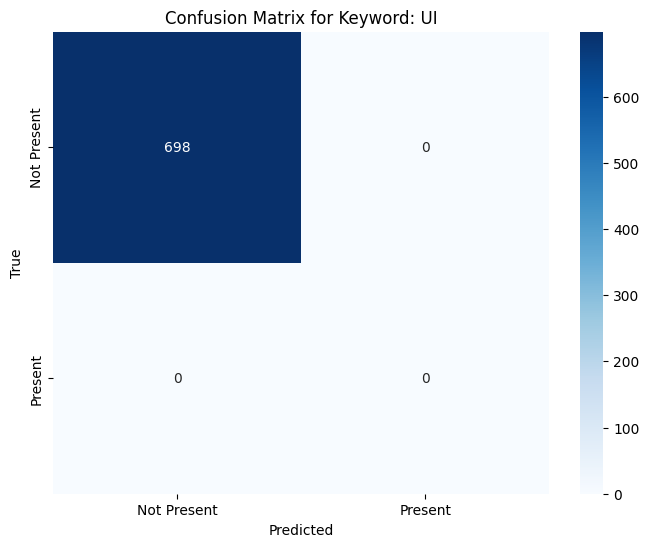

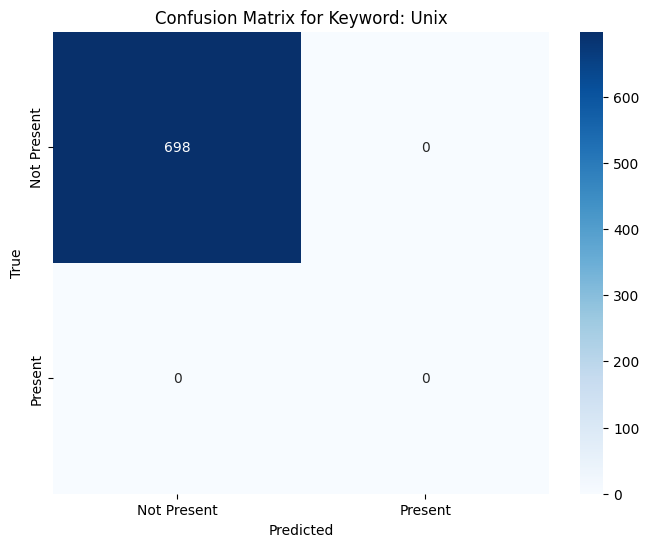

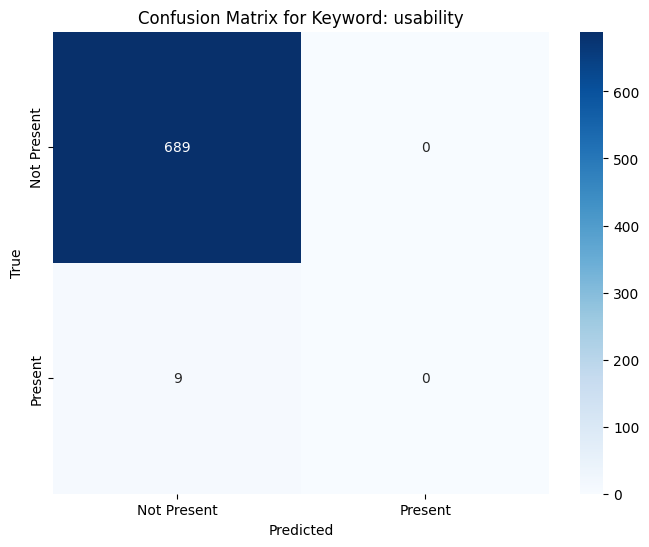

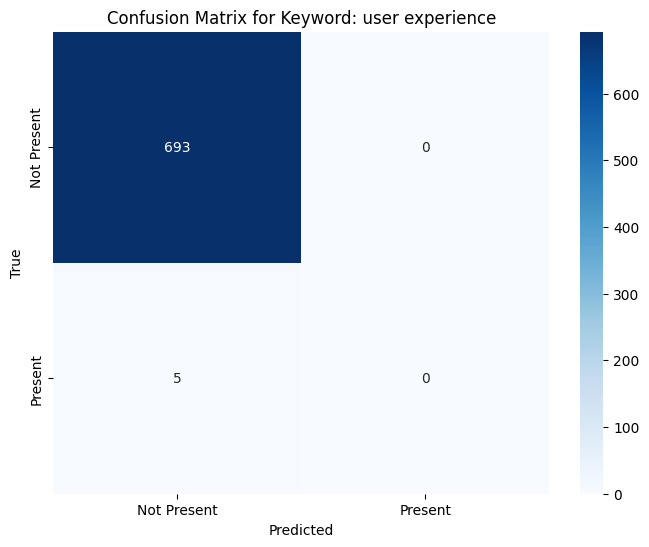

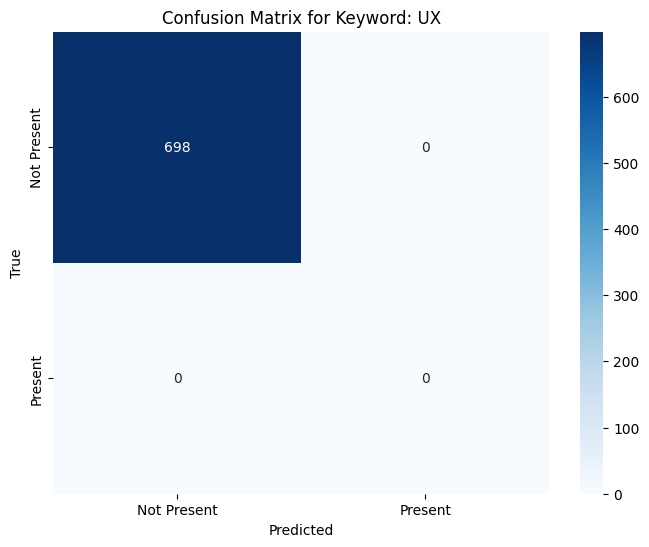

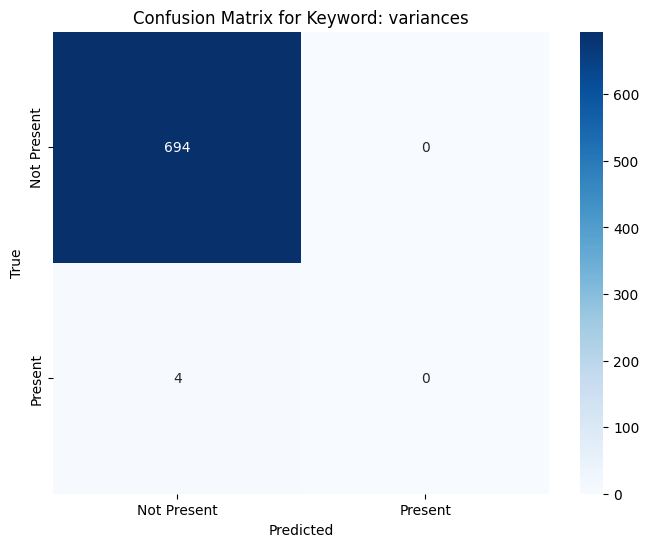

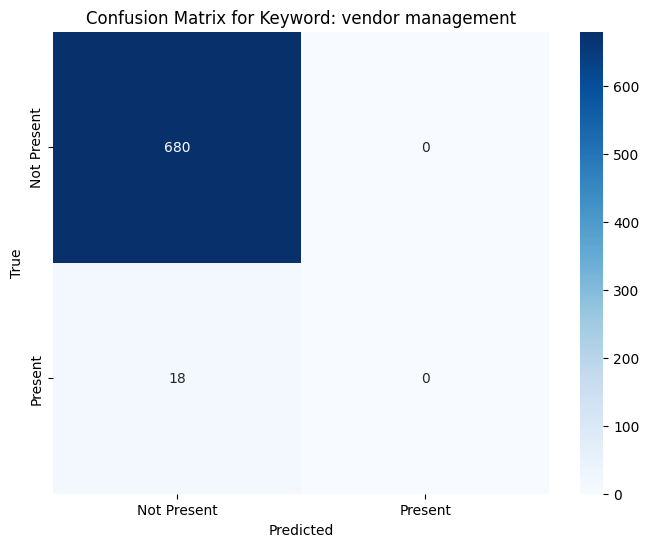

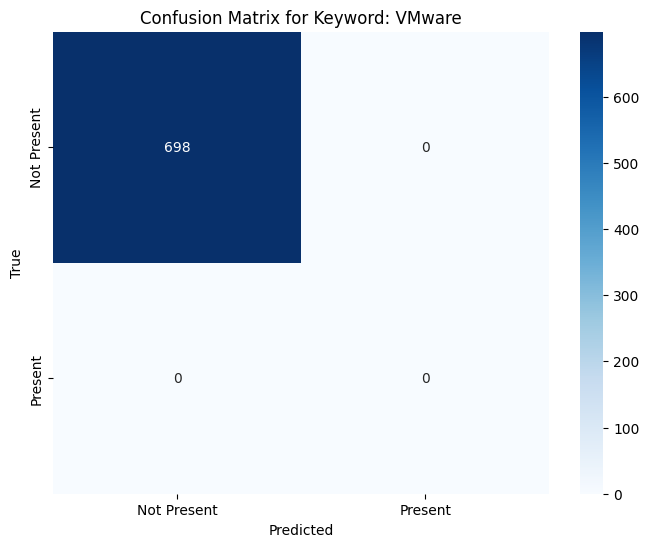

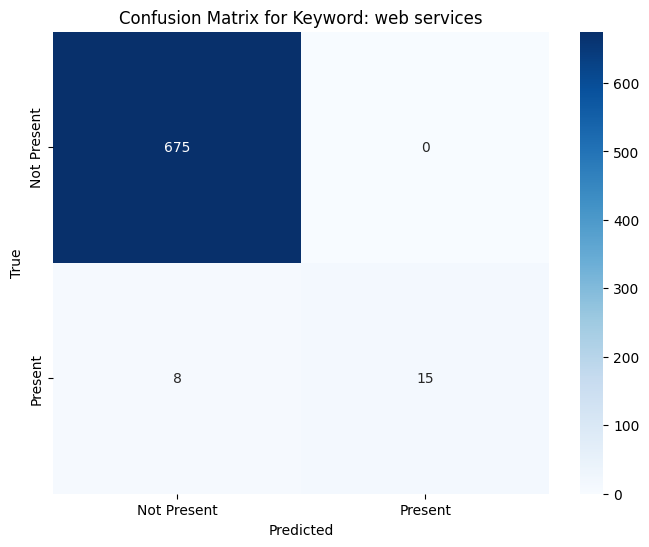

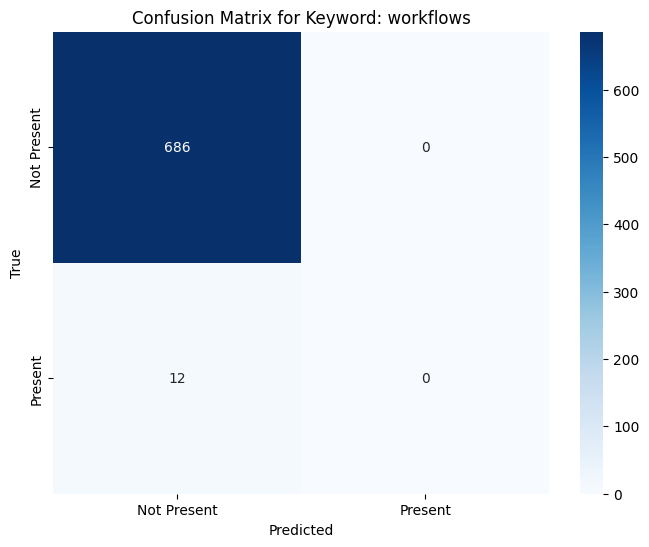

In [53]:
def plot_confusion_matrix(cm, keyword):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Present', 'Present'],
                yticklabels=['Not Present', 'Present'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Keyword: {keyword}')
    plt.show()

# Plot confusion matrices for each keyword
for i, (conf_matrix, keyword) in enumerate(zip(conf_matrices, keywords)):
    plot_confusion_matrix(conf_matrix, keyword)